# Ï¥àÍ∏∞ ÏÑ§Ï†ï Î∞è Î™®Îìà Î∂àÎü¨Ïò§Í∏∞

In [1]:
import warnings 

warnings.filterwarnings(action='ignore')

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import calmap
import calplot
from vega_datasets import data as vds

plt.rc('font', family='Malgun Gothic') 
plt.style.use('fivethirtyeight')
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # Î∞∞Í≤ΩÏÉâÍπî
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
pd.set_option('mode.chained_assignment',  None)

In [121]:
ColorGrid='#2A3459'
ColorLine1='#FEE715'
ColorLine2='#127319'

# COVID19 ÏßÑÌñâ ÏÉÅÌô©

In [99]:
# raw ÏΩîÎ°úÎÇò Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

covid_data=pd.read_csv('data/Covid_case.csv')

In [100]:
# ÌïÑÏöî ÏπºÎüºÎßå Ï∂îÏ∂ú
# ÏΩîÎ°úÎÇò ÏùºÎ≥Ñ ÌôïÏßÑÏûê Ïàò ÏπºÎüº Ï∂îÍ∞Ä
# Ï†ïÏàòÌòï stateDtÎ•º DatetimeÌòï stateDtÎ°ú Î≥ÄÌôò ÌõÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï

covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê','decideCnt','deathCnt']]
covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê','ÎàÑÏ†ÅÌôïÏßÑÏûê','ÎàÑÏ†ÅÏÇ¨ÎßùÏûê']
covid_data_new.index=pd.to_datetime(covid_data_new['ÏùºÏûê'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('ÏùºÏûê',axis=1)
covid_data_new['ÎÖÑÎèÑ']=covid_data_new.index.year
covid_data_new['Ïõî']=covid_data_new.index.month
covid_data_new.head()

ÏùºÎ≥ÑÌôïÏßÑÏûê   ÎàÑÏ†ÅÌôïÏßÑÏûê   ÎàÑÏ†ÅÏÇ¨ÎßùÏûê    ÎÖÑÎèÑ  Ïõî
ÏùºÏûê                                         
2021-09-25     NaN  298401  2441.0  2021  9
2021-09-24  3269.0  295132  2434.0  2021  9
2021-09-23  2433.0  292699  2427.0  2021  9
2021-09-22  1716.0  290983  2419.0  2021  9
2021-09-21  1720.0  289263  2413.0  2021  9

In [101]:
# ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏàò Î∂ÑÌè¨ ÌôïÏù∏

covid_data_new.describe().ÏùºÎ≥ÑÌôïÏßÑÏûê

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: ÏùºÎ≥ÑÌôïÏßÑÏûê, dtype: float64

<AxesSubplot:title={'center':'<COVID-19 ÏùºÏûêÎ≥Ñ ÎàÑÏ†Å ÌôïÏßÑÏûê>\n'}, xlabel='ÏùºÏûê', ylabel='ÎàÑÏ†ÅÌôïÏßÑÏûê'>

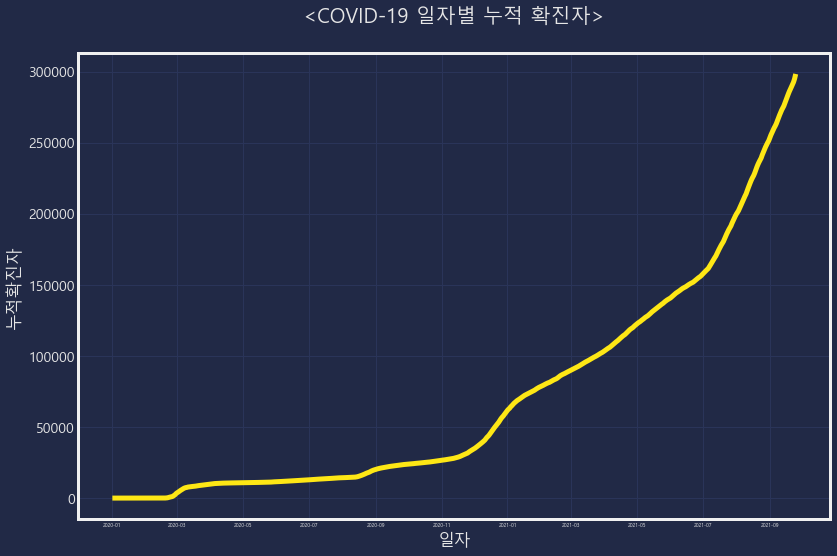

In [102]:
# ÏΩîÎ°úÎÇò ÎàÑÏ†Å ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

plt.figure(figsize=(12,8))
plt.title('<COVID-19 ÏùºÏûêÎ≥Ñ ÎàÑÏ†Å ÌôïÏßÑÏûê>\n')
plt.grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background

sns.lineplot(data=covid_data_new, x='ÏùºÏûê', y='ÎàÑÏ†ÅÌôïÏßÑÏûê',linewidth='5',color=ColorLine1)

<AxesSubplot:title={'center':'<2020ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ>\n'}>

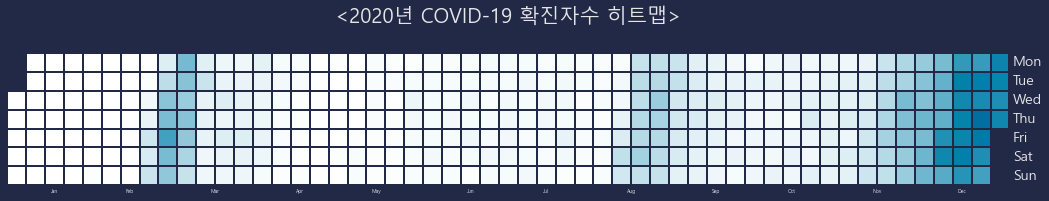

In [91]:
#ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Ïàò ÌûàÌä∏Îßµ(2020)

plt.figure(figsize=(16,8))
plt.title('<2020ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ>\n')
calmap.yearplot(data=covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'],year=2020,cmap='ocean_r')

<AxesSubplot:title={'center':'<2021ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ>\n'}>

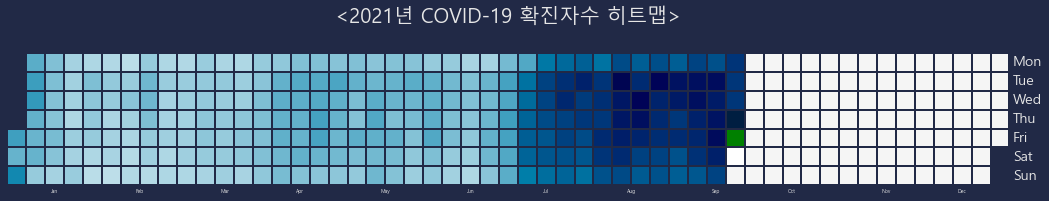

In [92]:
#ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Ïàò ÌûàÌä∏Îßµ(2021)

plt.figure(figsize=(16,8))
plt.title('<2021ÎÖÑ COVID-19 ÌôïÏßÑÏûêÏàò ÌûàÌä∏Îßµ>\n')
calmap.yearplot(data=covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'],year=2021, cmap='ocean_r')

<AxesSubplot:title={'center':'<COVID-19 ÏùºÏûêÎ≥Ñ ÌôïÏßÑÏûê Ïàò>\n'}, xlabel='ÏùºÏûê', ylabel='ÏùºÎ≥ÑÌôïÏßÑÏûê'>

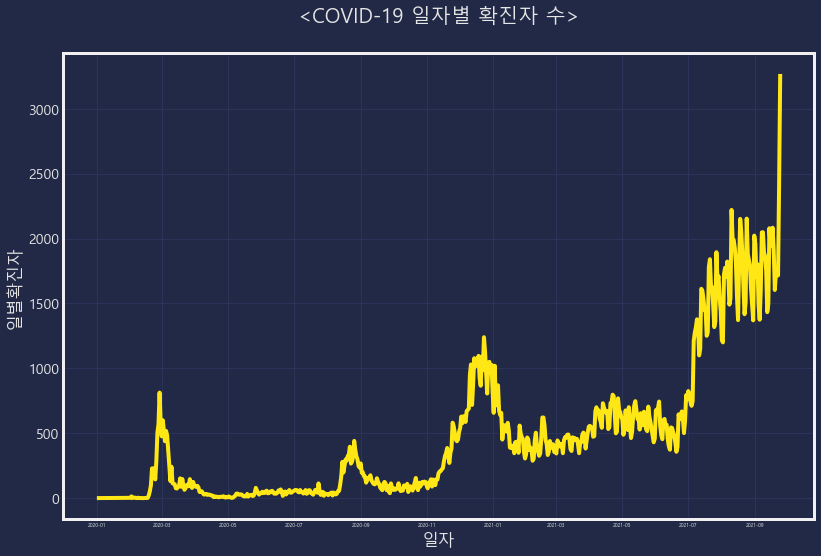

In [103]:
# ÏΩîÎ°úÎÇò ÏùºÎ≥Ñ ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

plt.figure(figsize=(12,8))
plt.title('<COVID-19 ÏùºÏûêÎ≥Ñ ÌôïÏßÑÏûê Ïàò>\n')
plt.grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background
sns.lineplot(data=covid_data_new, x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',color=ColorLine1)

ÏúÑ ÏÑ∏Í∞ÄÏßÄ Í∑∏ÎûòÌîÑÏùò ÏùºÎ≥Ñ/ÎÖÑÎèÑÎ≥Ñ ÌôïÏßÑÏûê ÌôïÏù∏ Í≤∞Í≥º, 2020ÎÖÑ 3Ïõî, 2020ÎÖÑ 8Ïõî, 2020ÎÖÑ 12Ïõî, 2021ÎÖÑ 8Ïõî Ï¥ù 4Ï∞®Î°ÄÏùò ÎåÄÏú†ÌñâÏù¥ Î∞úÏÉù ÌñàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§

In [94]:
# ÎåÄÏú†Ìñâ Í∏∞Í∞Ñ ÌôïÏßÑÏûê Ïàò Ï∂îÏ∂ú

covid_data_1st_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==2)|(covid_data_new.Ïõî==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==8)|(covid_data_new.Ïõî==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.ÎÖÑÎèÑ==2020) & ((covid_data_new.Ïõî==12)|(covid_data_new.Ïõî==11)))|
                ((covid_data_new.ÎÖÑÎèÑ==2021)&((covid_data_new.Ïõî==1)|(covid_data_new.Ïõî==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.ÎÖÑÎèÑ==2021) & ((covid_data_new.Ïõî==6)|(covid_data_new.Ïõî==7)|(covid_data_new.Ïõî==8)|(covid_data_new.Ïõî==9))]

<AxesSubplot:title={'center':'<4Ï∞® ÎåÄÏú†Ìñâ>\n'}, xlabel='ÏùºÏûê', ylabel='ÏùºÎ≥ÑÌôïÏßÑÏûê'>

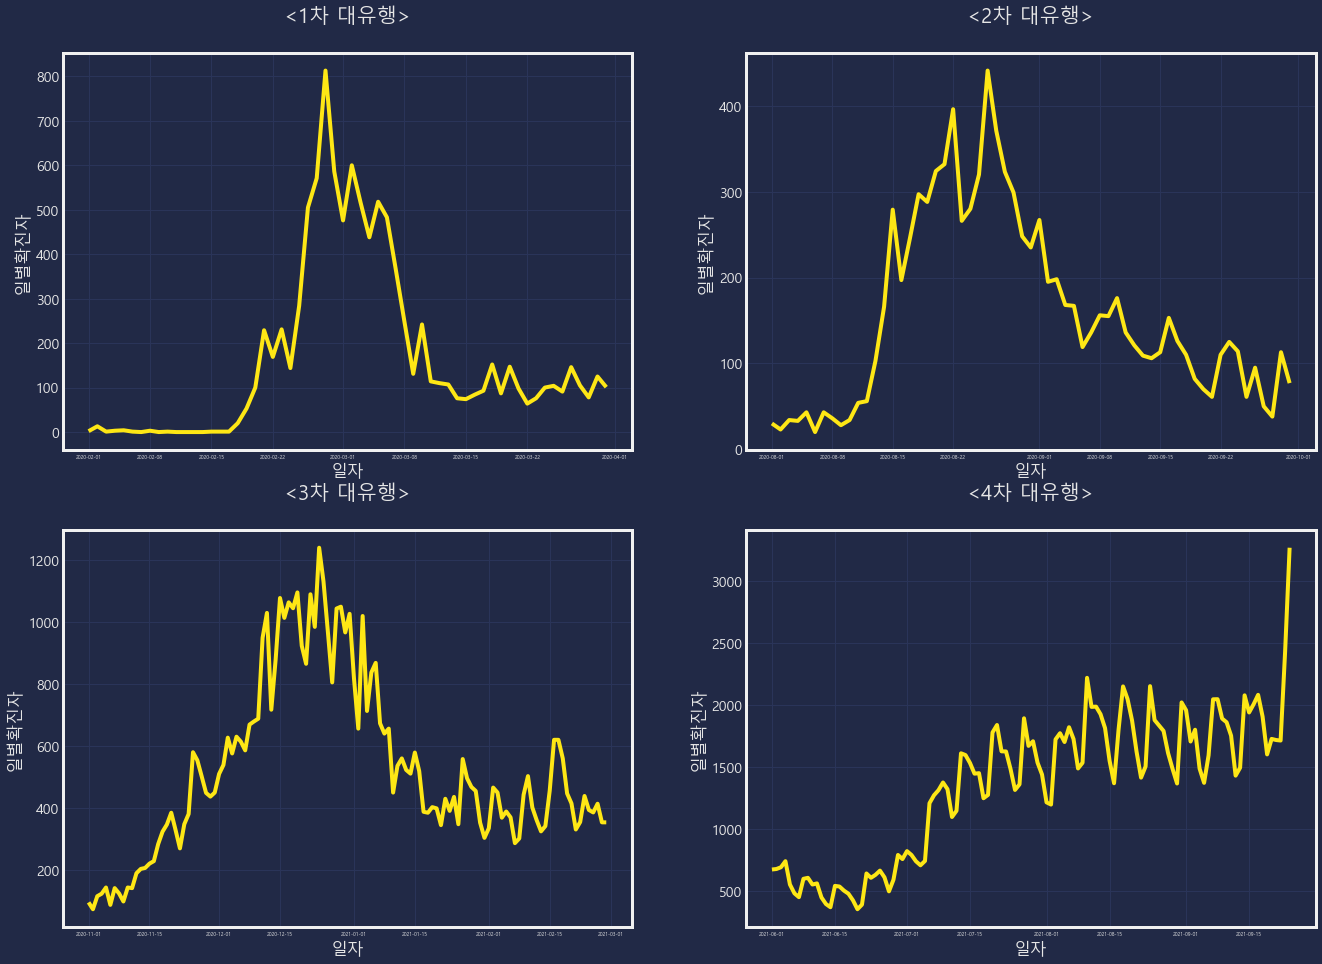

In [104]:
# ÎåÄÏú†Ìñâ Í∏∞Í∞Ñ ÌôïÏßÑÏûê Ïàò ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,15)

axes[0][0].set(title='<1Ï∞® ÎåÄÏú†Ìñâ>\n')
axes[0][1].set(title='<2Ï∞® ÎåÄÏú†Ìñâ>\n')
axes[1][0].set(title='<3Ï∞® ÎåÄÏú†Ìñâ>\n')
axes[1][1].set(title='<4Ï∞® ÎåÄÏú†Ìñâ>\n')
for i in range(2):
    for j in range(2):
        axes[i][j].grid(color=ColorGrid)  # bluish dark grey, but slightly lighter than background

sns.lineplot(data=covid_data_1st_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[0][0],color=ColorLine1)
sns.lineplot(data=covid_data_2nd_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[0][1],color=ColorLine1)
sns.lineplot(data=covid_data_3rd_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[1][0],color=ColorLine1)
sns.lineplot(data=covid_data_4th_pandemic,x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', ax=axes[1][1],color=ColorLine1)

4Ï∞®Î°ÄÏùò ÎåÄÏú†ÌñâÏù¥ ÏãúÍ∞ÅÌôîÎ°ú ÎöúÎ†∑ÌïòÍ≤å ÌëúÌòÑÎêòÎ©∞, 4Ï∞® ÎåÄÏú†ÌñâÏùÄ Ïó¨Ï†ÑÌûà ÏßÑÌñâÏ§ëÏù¥Îã§.

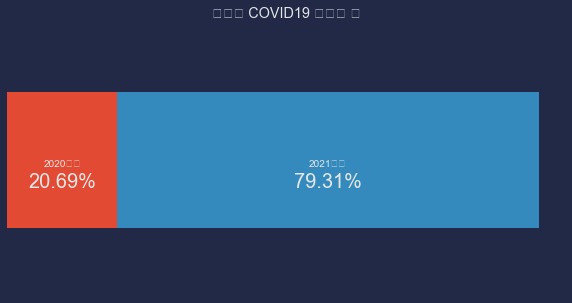

In [28]:
# ÏΩîÎ°úÎÇò ÎÖÑÎèÑÎ≥Ñ ÌôïÏßÑÏûê ÏãúÍ∞ÅÌôî

year_covid=pd.DataFrame(covid_data_new.groupby('ÎÖÑÎèÑ')['ÏùºÎ≥ÑÌôïÏßÑÏûê'].sum()).T

total_decideCnt=year_covid[2020]+year_covid[2021]

ax = year_covid.plot(kind='barh', stacked=True, title='Ïó∞ÎèÑÎ≥Ñ COVID19 ÌôïÏßÑÏûê Ïàò', rot=0,figsize=(10,5))
for idx, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{2020+idx}ÎÖÑÎèÑ", xy=(left+width/2, bottom+height/2), ha='center', va='top',fontsize=10)
    ax.annotate(f"\n\n{(width*100)/int(total_decideCnt):.2f}%", xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=20)
    
    
plt.box(False)
ax.set_xticks([])
ax.set_yticks([])
ax.get_legend().remove()
plt.show()

# Í≥†ÏÜçÎèÑÎ°ú Ïù¥Ïö© ÍµêÌÜµÎüâ Ï∂îÏù¥

In [29]:
# ÎÖÑÎèÑÎ≥Ñ/Î∂ÑÍ∏∞Î≥Ñ ÍµêÌÜµÎüâ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

traffic_2018_01=pd.read_csv('data/2018_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01Î∂ÑÍ∏∞.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02Î∂ÑÍ∏∞.csv',encoding='cp949')

In [30]:
# Î∂ÑÍ∏∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú Ìï©ÏπòÍ∏∞

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
# Î™ÖÏπ≠Ïù¥ Î∂àÍ∑úÏπôÌïòÏó¨ ÌÜµÏùº

traffic_data=traffic_data.replace('ÏÑúÏÑúÏö∏ÏòÅÏóÖÏÜå','ÏÑúÏÑúÏö∏')
traffic_data=traffic_data.replace('ÏÑúÏö∏ÏòÅÏóÖÏÜå','ÏÑúÏö∏')
traffic_data=traffic_data.replace('ÏÑúÎåÄÍµ¨ÏòÅÏóÖÏÜå','ÏÑúÎåÄÍµ¨')
traffic_data=traffic_data.replace('Î∂ÅÎåÄÍµ¨ÏòÅÏóÖÏÜå','Î∂ÅÎåÄÍµ¨')
traffic_data=traffic_data.replace('ÎÇ®ÎåÄÍµ¨ÏòÅÏóÖÏÜå','ÎÇ®ÎåÄÍµ¨')
traffic_data=traffic_data.replace('Î∂ÅÍ∞ïÎ¶âÏòÅÏóÖÏÜå','Î∂ÅÍ∞ïÎ¶â')
traffic_data=traffic_data.replace('ÎÇ®Í∞ïÎ¶âÏòÅÏóÖÏÜå','ÎÇ®Í∞ïÎ¶â')
traffic_data=traffic_data.replace('Í∞ïÎ¶âÏòÅÏóÖÏÜå','Í∞ïÎ¶â')

In [31]:
def day_of_week(traffic_data): #ÏöîÏùº Ï∂îÍ∞Ä Ìï®Ïàò
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['ÎÖÑÎèÑ']=traffic_data.index.year 
    traffic_data['Ïõî']=traffic_data.index.month
    days={0:'ÏõîÏöîÏùº',1:'ÌôîÏöîÏùº',2:'ÏàòÏöîÏùº',3:'Î™©ÏöîÏùº',4:'Í∏àÏöîÏùº',5:'ÌÜ†ÏöîÏùº',6:'ÏùºÏöîÏùº'}
    traffic_data['ÏöîÏùº']=traffic_data.index.dayofweek 
    traffic_data.ÏöîÏùº=traffic_data.ÏöîÏùº.apply(lambda x : days[x])
    return traffic_data

In [32]:
# ÌïÑÏöî ÏπºÎüºÎßå Ï∂îÏ∂ú
# Ï†ïÏàòÌòï ÏßëÍ≥ÑÏùºÏûêÎ•º DatetimeÌòï ÏßëÍ≥ÑÏùºÏûêÎ°ú Î≥ÄÌôò ÌõÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
# ÏùºÎ≥Ñ ÎÖÑÎèÑ/Ïõî/ÏöîÏùº ÏπºÎüº Ï∂îÍ∞Ä

traffic_data.index=traffic_data.ÏßëÍ≥ÑÏùºÏûê
traffic_data=traffic_data.drop('ÏßëÍ≥ÑÏùºÏûê',axis=1)
traffic_data=traffic_data[['ÏòÅÏóÖÏÜåÎ™Ö','1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ']]
traffic_data=day_of_week(traffic_data)
traffic_data.head()

ÏòÅÏóÖÏÜåÎ™Ö  1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ  Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                         
2018-01-01     Í∞ÄÎùΩ    211      6      6     21     27      4   275  2018  1   
2018-01-01     Í∞ÄÎùΩ    615     14      5     14     96     26   770  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   2358     31     48     57    131    273  2898  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   7148     27     71     27    267    378  7918  2018  1   
2018-01-01  Í∞ÄÎùΩ(Í∞ú)   2946     29     52     48    150    357  3582  2018  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº  
2018-01-01  ÏõîÏöîÏùº

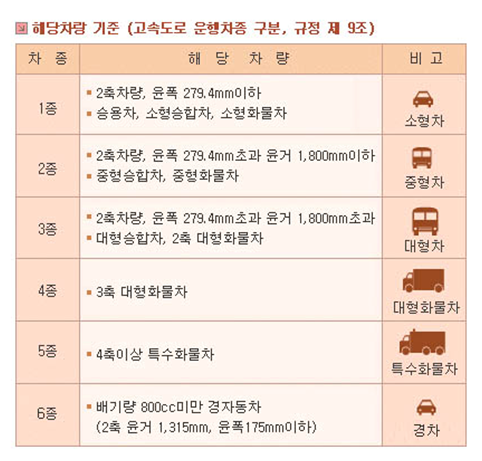

## Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Î∂ÑÏÑù

In [33]:
# Î™®Îì† Í≥≥Ïùò ÌÜ®Í≤åÏù¥Ìä∏Ïóê ÎåÄÌïú ÍµêÌÜµÎüâ Ìï©ÏÇ∞

traffic_data_total=traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
traffic_data_total=day_of_week(traffic_data_total)
# ÎÖÑÎèÑÎ≥Ñ Ï†ÄÏû•

traffic_data_2018=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2018]
traffic_data_2019=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2019]
traffic_data_2020=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2020]
traffic_data_2021=traffic_data_total[traffic_data_total.ÎÖÑÎèÑ==2021]

# ÏΩîÎ°úÎÇò Í∏∞Í∞Ñ Ï†ÄÏû•

traffic_data_2020_2021=traffic_data_total[(traffic_data_total.ÎÖÑÎèÑ==2020)|(traffic_data_total.ÎÖÑÎèÑ==2021)]
traffic_data_total.head()

1Ï¢ÖÍµêÌÜµÎüâ   2Ï¢ÖÍµêÌÜµÎüâ   3Ï¢ÖÍµêÌÜµÎüâ   4Ï¢ÖÍµêÌÜµÎüâ   5Ï¢ÖÍµêÌÜµÎüâ   6Ï¢ÖÍµêÌÜµÎüâ     Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                            
2018-01-01  5562671   64729  140284   36796   34705  240045  6079230  2018  1   
2018-01-02  4945308  200328  257620  163881  234282  290196  6091615  2018  1   
2018-01-03  4841053  232174  293244  212214  294425  289377  6162487  2018  1   
2018-01-04  4902656  232305  293413  209227  300632  291083  6229316  2018  1   
2018-01-05  5342859  233726  299322  209493  299666  310678  6695744  2018  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2018-01-01  ÏõîÏöîÏùº  
2018-01-02  ÌôîÏöîÏùº  
2018-01-03  ÏàòÏöîÏùº  
2018-01-04  Î™©ÏöîÏùº  
2018-01-05  Í∏àÏöîÏùº

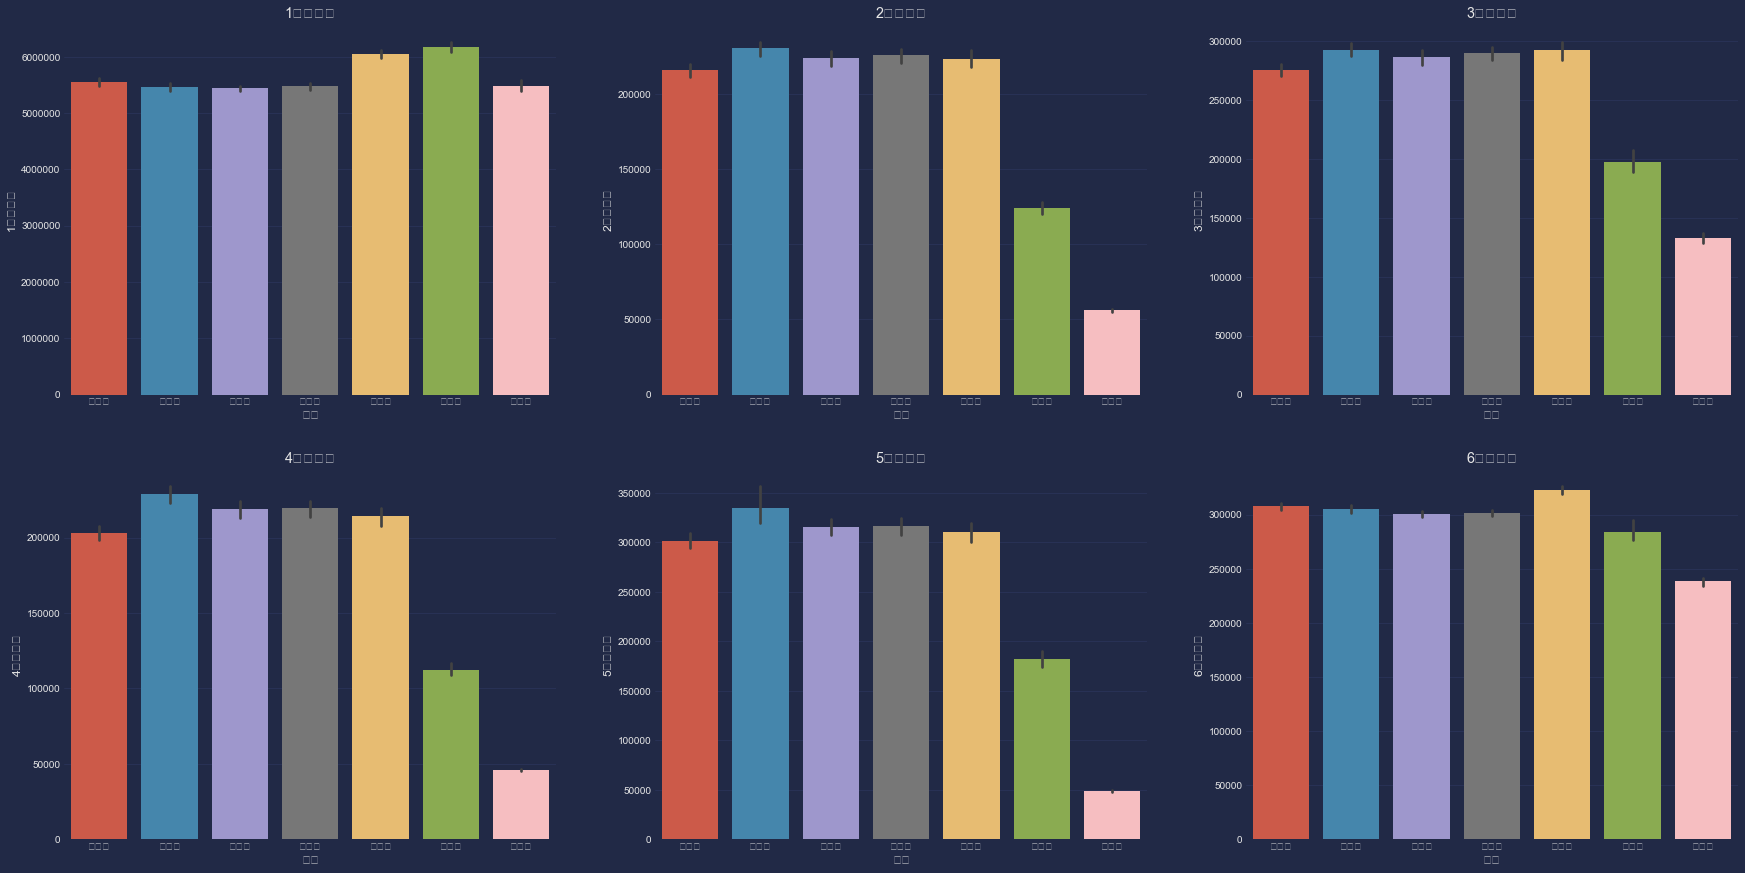

In [35]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# lim ÏÑ§Ï†ïÌïòÎ©¥ ÏïàÎ≥¥Ïó¨ „Ö†
traffic=[['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ'],['4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']]
fig, axes=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(30,15)

for i in range(2):
    for j in range(3):
        #axes[i][j].set_ylim([0,9000000])
        axes[i][j].grid(color=ColorGrid) 
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        axes[i][j].set(title=traffic[i][j])
        sns.barplot(x='ÏöîÏùº', y=traffic[i][j], data=traffic_data_total,ax=axes[i][j])

ÏöîÏùºÎ≥Ñ ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º, 1Ï¢Ö ÍµêÌÜµÏùò ÍµêÌÜµÎüâÏùÄ ÏöîÏùºÍ≥º Í¥ÄÍ≥ÑÏóÜÏù¥ Í±∞Ïùò ÎπÑÏä∑ÌïòÎã§.
2Ï¢ÖÎ∂ÄÌÑ∞ 6Ï¢ÖÍπåÏßÄÏùò ÍµêÌÜµÎüâÏùÄ Ï£ºÎßêÏù¥ Ï†ÅÏúºÎ©∞, ÌèâÏùºÏù¥ ÎßéÎã§.
Ïù¥Îäî Í∑ºÎ¨¥Î•º ÏúÑÌï¥ ÏõÄÏßÅÏù¥Îäî ÏÇ¨ÎûåÎì§Ïùò ÍµêÌÜµÎüâÏóê ÏùòÌï¥ÏÑú ÎßéÎã§Í≥† ÏÉùÍ∞ÅÎêòÏñ¥ÏßÄÎ©∞,
Í∞úÏù∏Ï†ÅÏù∏ ÏùºÎ°ú ÏõÄÏßÅÏù¥Îäî ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï£ºÎßêÏùò ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§Í≥† ÏÉùÍ∞ÅÎêúÎã§.
ÎòêÌïú, 1Ï¢Ö ÍµêÌÜµÎüâ ÌòπÏùÄ Ï¥ù ÍµêÌÜµÎüâÎ≥¥Îã§Îäî ÎÇòÎ®∏ÏßÄ ÍµêÌÜµÎüâÏùÑ ÌôïÏù∏Ìï¥Î≥¥Îäî Í≤ÉÏù¥ ÎöúÎ†∑Ìïú Î≥ÄÌôîÎ•º ÌôïÏù∏Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.

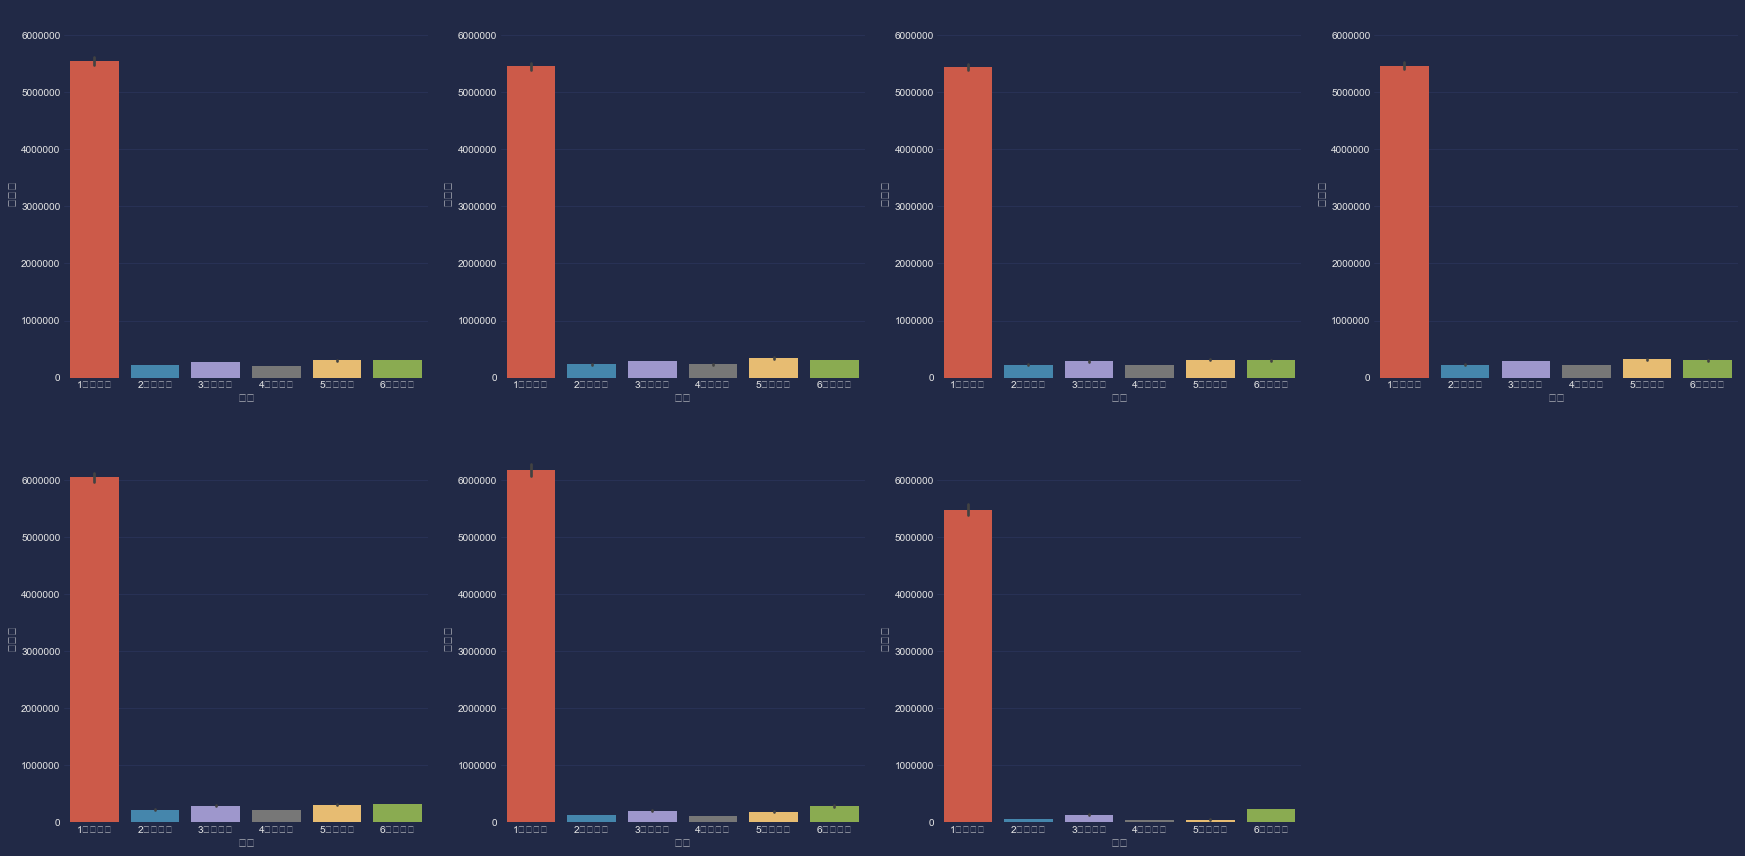

In [37]:
# Ï∞®Ï¢ÖÎ≥Ñ ÏöîÏùº ÍµêÌÜµÎüâ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# lim ÏÑ§Ï†ïÌïòÎ©¥ ÏïàÎ≥¥Ïó¨ „Ö†
traffic=[['ÏõîÏöîÏùº','ÌôîÏöîÏùº','ÏàòÏöîÏùº','Î™©ÏöîÏùº'],['Í∏àÏöîÏùº','ÌÜ†ÏöîÏùº','ÏùºÏöîÏùº',None]]
fig, axes=plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(30,15)

for i in range(2):
    for j in range(4):
        if i==1 and j==3: break
        axes[i][j].grid(color=ColorGrid) 
        axes[i][j].set_ylim([0,6500000])
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        melted=traffic_data_total[traffic_data_total['ÏöîÏùº']==traffic[i][j]]
        melted=melted.drop(['ÎÖÑÎèÑ','Ïõî','ÏöîÏùº','Ï¥ùÍµêÌÜµÎüâ'],axis=1)
        melted=pd.melt(melted)
        melted.columns=['Ï∞®Ï¢Ö','ÍµêÌÜµÎüâ']
        sns.barplot(x='Ï∞®Ï¢Ö',y='ÍµêÌÜµÎüâ',data=melted,ax=axes[i][j])
axes[1][3].remove()

### Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Ï∂îÏù¥ ÌôïÏù∏ - 1Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\n<ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

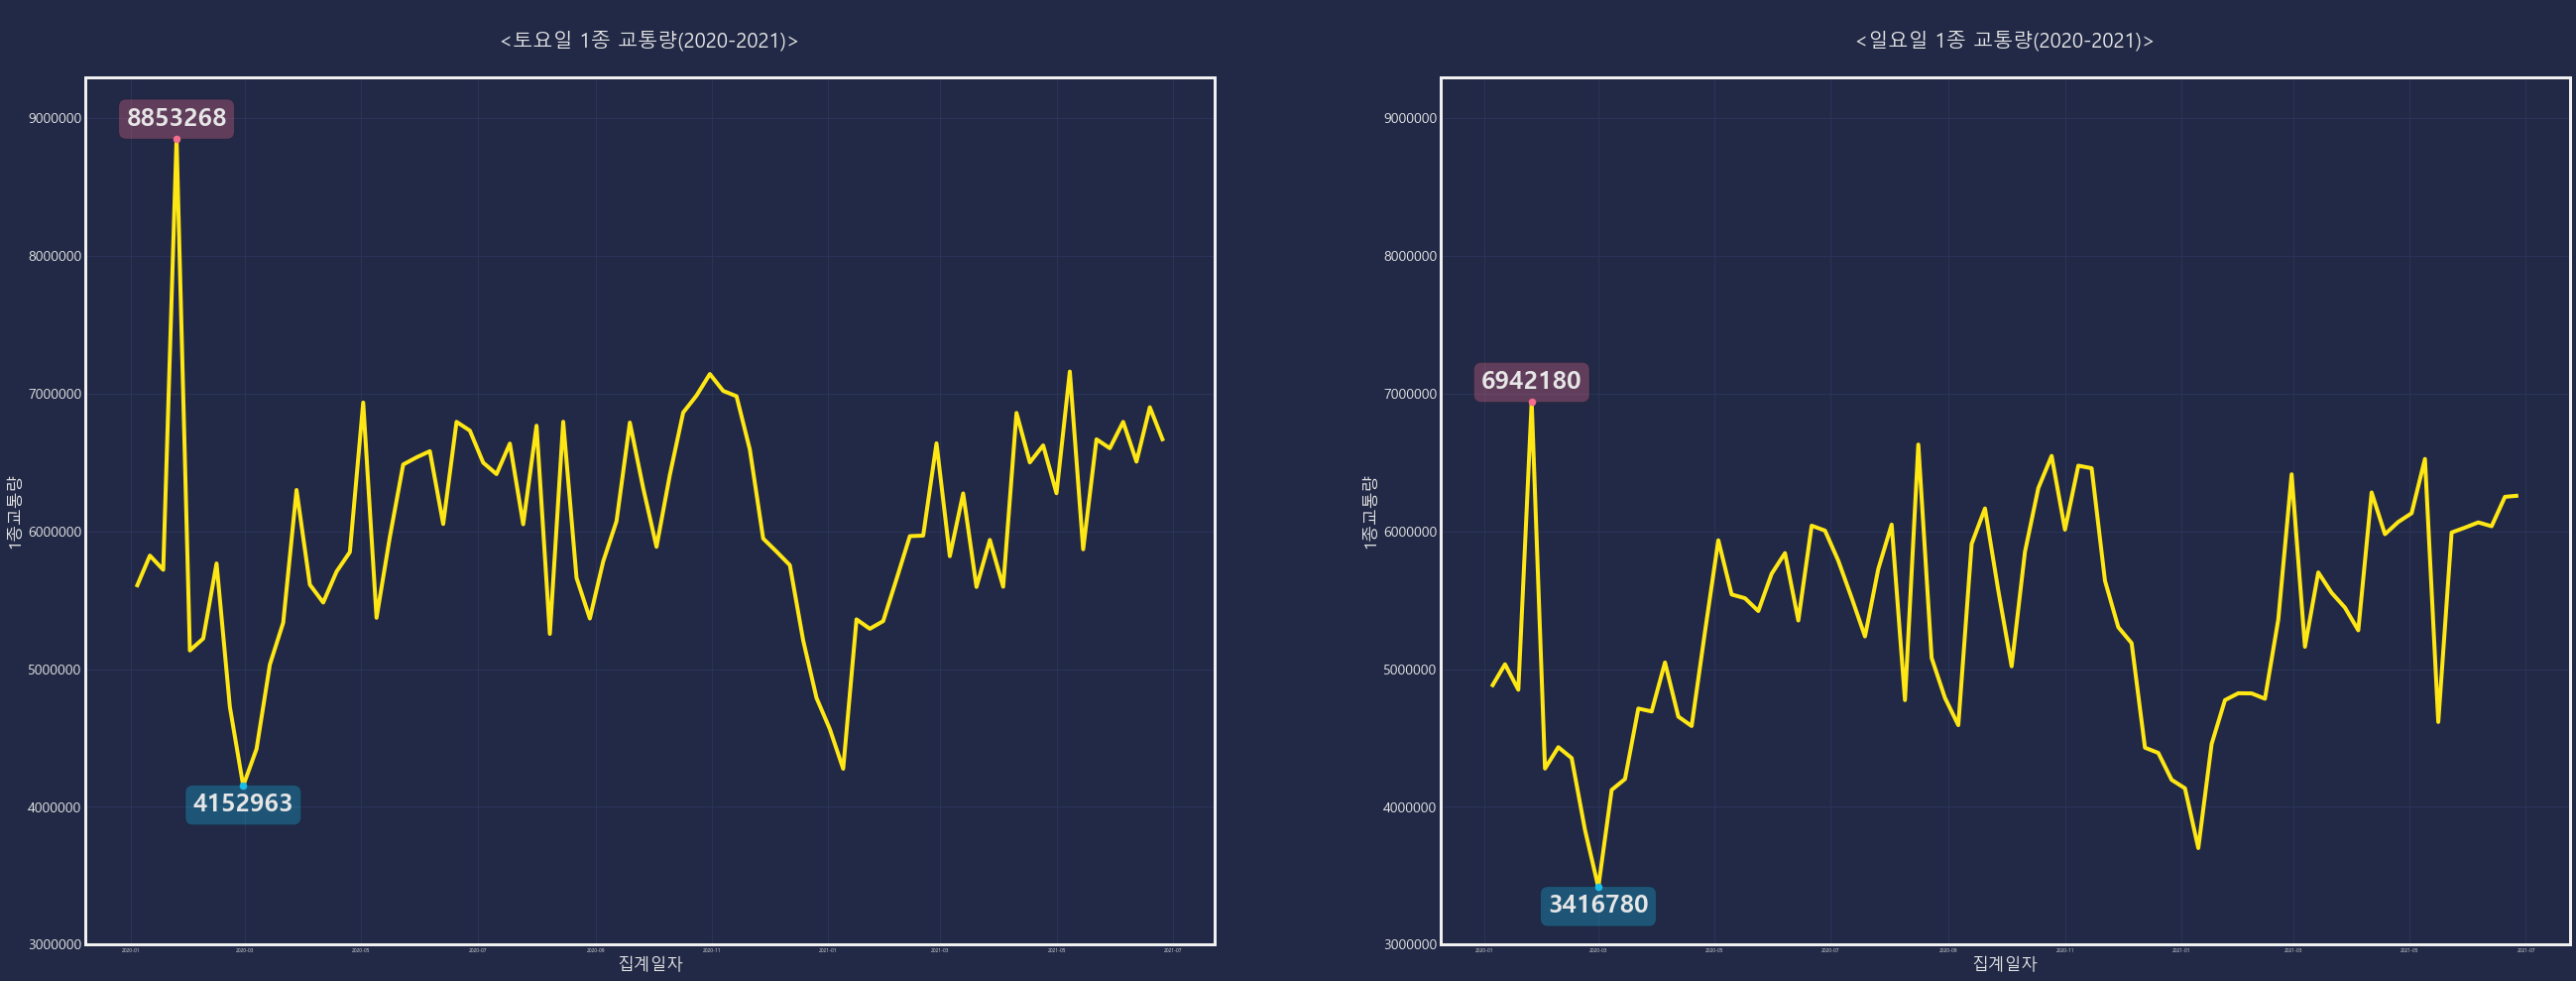

In [150]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([3000000,9300000])
    axes[i].grid(ColorGrid)

axes[0].set(title='\n<ÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

x1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')].index
y1=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')]['1Ï¢ÖÍµêÌÜµÎüâ']

x2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')].index
y2=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')]['1Ï¢ÖÍµêÌÜµÎüâ']

x=[x1, x2]
y=[y1, y2]
for i in range(2):
    axes[i].grid(color=ColorGrid) 
    axes[i].scatter(x[i][np.argmax(y[i])], np.max(y[i]), 
                c='#F36E8E',s=50, zorder=20)

    axes[i].scatter(x[i][np.argmin(y[i])], np.min(y[i]), 
                c='#1ABDE9',s=50, zorder=20)

    axes[i].text(x[i][np.argmax(y[i])], np.max(y[i])+50000, s=f'{np.max(y[i])}', fontweight='bold',
             va='bottom', ha='center', 
             bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3), size=25)

    axes[i].text(x[i][np.argmin(y[i])], np.min(y[i])-50000, s=f'{np.min(y[i])}', fontweight='bold',
             va='top', ha='center', 
             bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3), size=25)


sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],lw=4,color=ColorLine1)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],lw=4,color=ColorLine1)

### Ï†ÑÍµ≠ ÍµêÌÜµÎüâ Ï∂îÏù¥ ÌôïÏù∏ - 2Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\n<ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

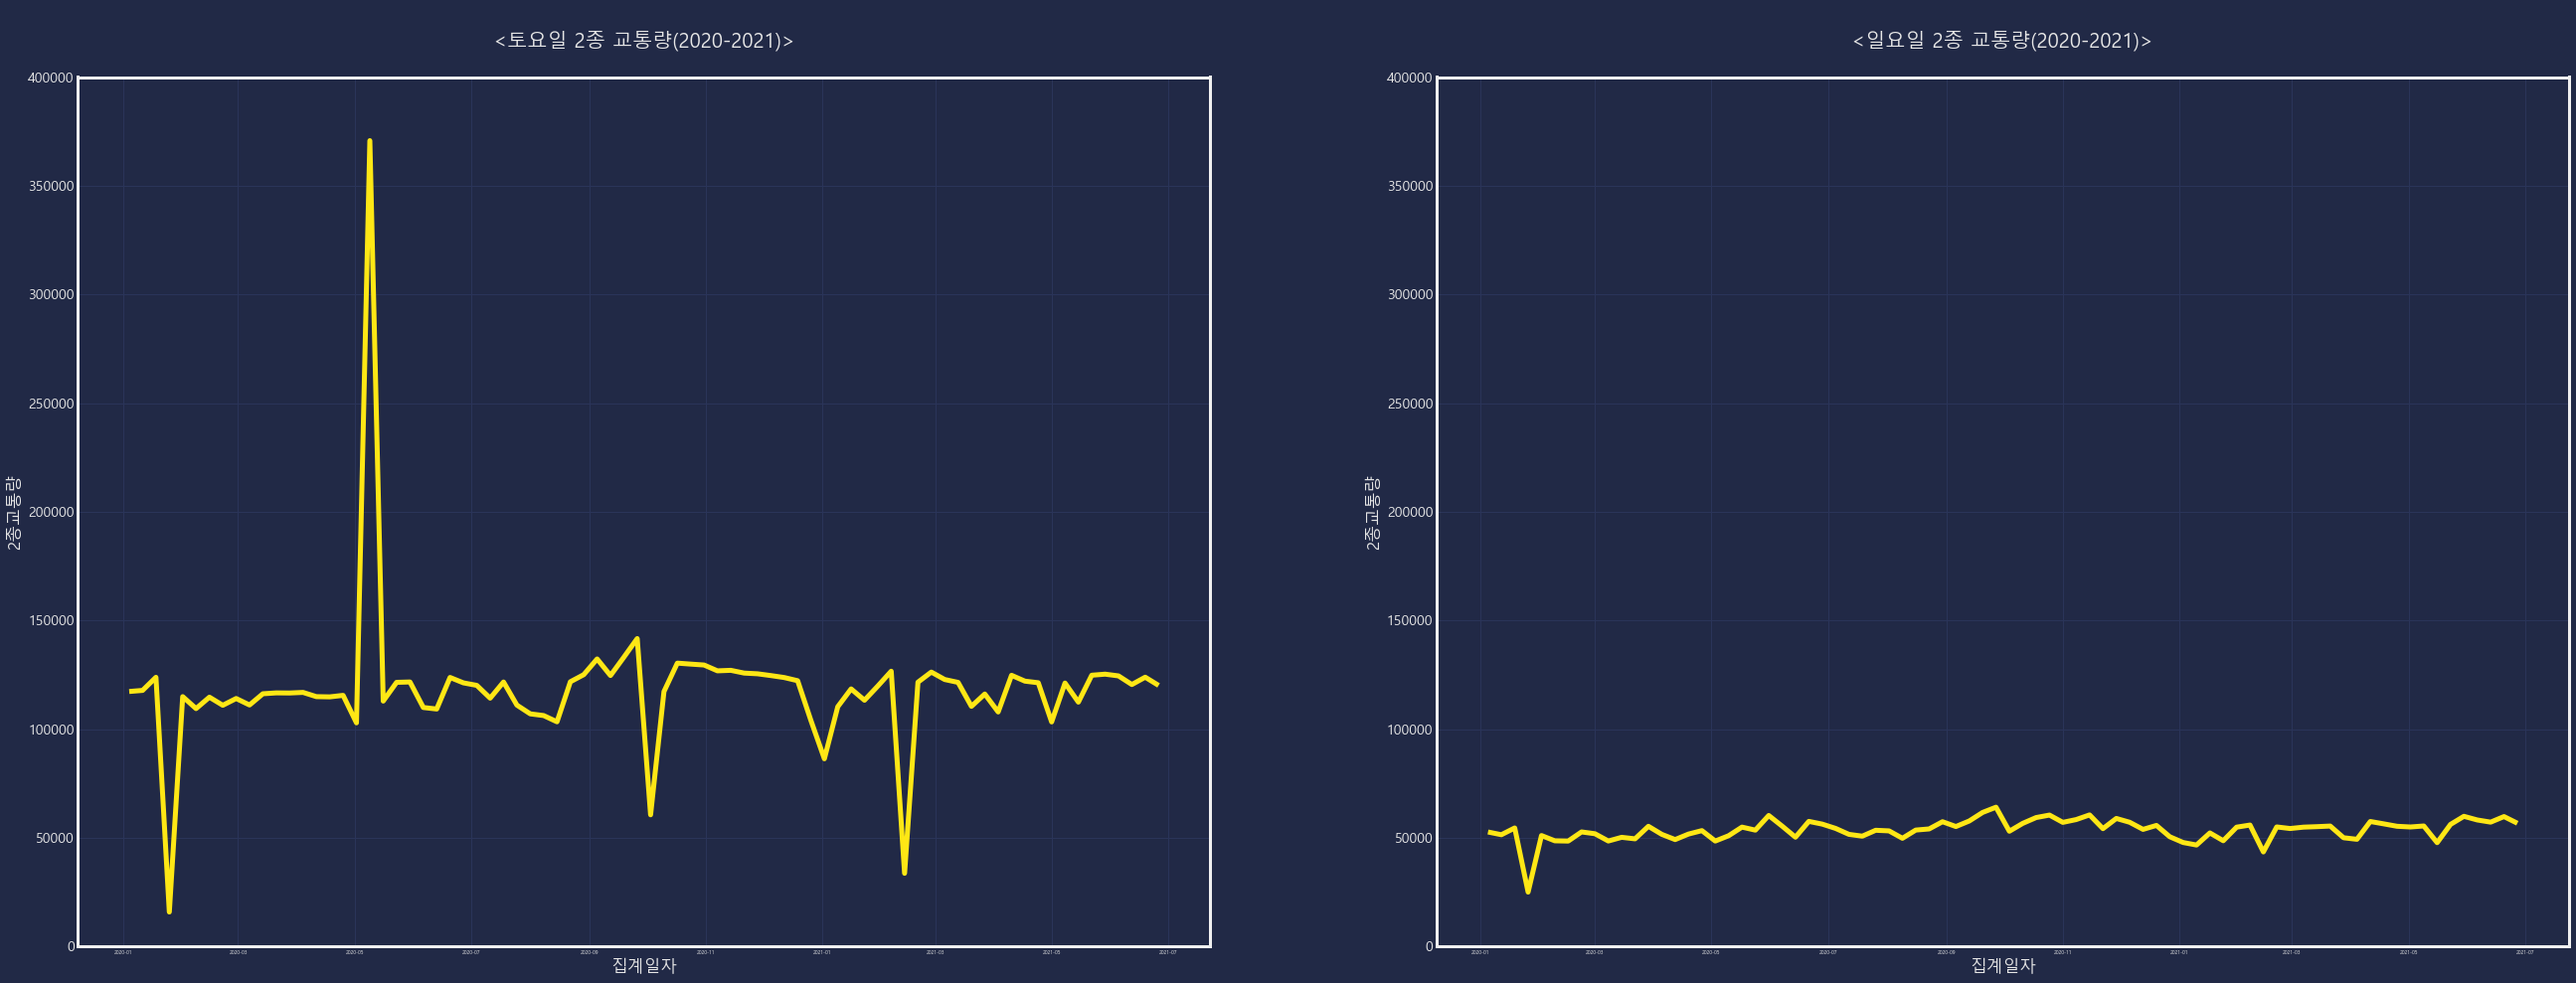

In [151]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,400000])
    axes[i].grid(color=ColorGrid) 
axes[0].set(title='\n<ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÌÜ†ÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],linewidth='5',color=ColorLine1)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.ÏöîÏùº=='ÏùºÏöîÏùº')], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],linewidth='5',color=ColorLine1)

## ÏÑúÏö∏ ÍµêÌÜµÎüâ Î∂ÑÏÑù

In [41]:
seoul_traffic_data=traffic_data[(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÏÑúÏö∏')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÎèôÏÑúÏö∏')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÏö∏')]
seoul_traffic_data=seoul_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
seoul_traffic_data=day_of_week(seoul_traffic_data)
#[ÏÑúÏö∏]1Ï¢ÖÍµêÌÜµÎüâ, 2Ï¢ÖÍµêÌÜµÎüâ ÏµúÏÜå ÏµúÎåÄÍ∞í Íµ¨ÌïòÍ∏∞

seoul_min_first=min(seoul_traffic_data['1Ï¢ÖÍµêÌÜµÎüâ'])
seoul_max_first=max(seoul_traffic_data['1Ï¢ÖÍµêÌÜµÎüâ'])

seoul_min_second=min(seoul_traffic_data['2Ï¢ÖÍµêÌÜµÎüâ'])
seoul_max_second=max(seoul_traffic_data['2Ï¢ÖÍµêÌÜµÎüâ'])

seoul_traffic_data.head()

1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ    Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî   ÏöîÏùº
ÏßëÍ≥ÑÏùºÏûê                                                                       
2018-01-01  422993   5819  20619   2523   1392  18046  471392  2018  1  ÏõîÏöîÏùº
2018-01-02  412943  17056  29178  11928   9202  22481  502788  2018  1  ÌôîÏöîÏùº
2018-01-03  395108  20067  32127  16606  11753  22022  497683  2018  1  ÏàòÏöîÏùº
2018-01-04  402322  19891  32029  16087  11928  22179  504436  2018  1  Î™©ÏöîÏùº
2018-01-05  435052  19531  33259  15420  11579  23623  538464  2018  1  Í∏àÏöîÏùº

### ÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ

<AxesSubplot:title={'center':'\n<ÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

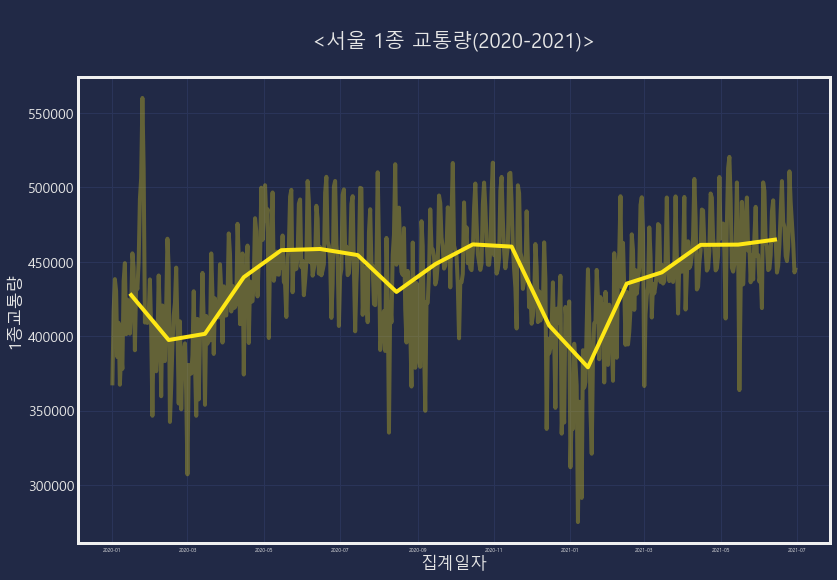

In [109]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÍ∞ÄÏö©) Î∂ÑÏÑù 

data=pd.DataFrame(seoul_traffic_data[((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-15')
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')

plt.figure(figsize=(12,8)) 
plt.grid(color=ColorGrid) 
plt.title('\n<ÏÑúÏö∏ 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1, alpha=0.3)
sns.lineplot(data=data, x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1)

ÍµêÌÜµÎüâÏù¥ Í∞ëÏûêÍ∏∞ Ï§ÑÏñ¥ÎìúÎäî ÏãúÍ∏∞Í∞Ä ÎààÏóê Î≥¥Ïù¥ÏßÄÎßå, Ï£ºÏ§ëÍ≥º Ï£ºÎßêÏùò ÍµêÌÜµÎüâ Í∑πÏã¨Ìïú Ï∞®Ïù¥Î°ú Ïù∏ÌïòÏó¨ Í∑∏ÎûòÌîÑ ÏÉÅÏóêÏÑú ÏßÑÎèôÏù¥ Ïã¨ÌïòÍ≤å ÏùºÏñ¥ÎÇúÎã§. Îî∞ÎùºÏÑú Ï£ºÎßêÎßå ÎπÑÍµêÌï¥ Î≥¥Ïûê.

<AxesSubplot:title={'center':'\n<ÏÑúÏö∏ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

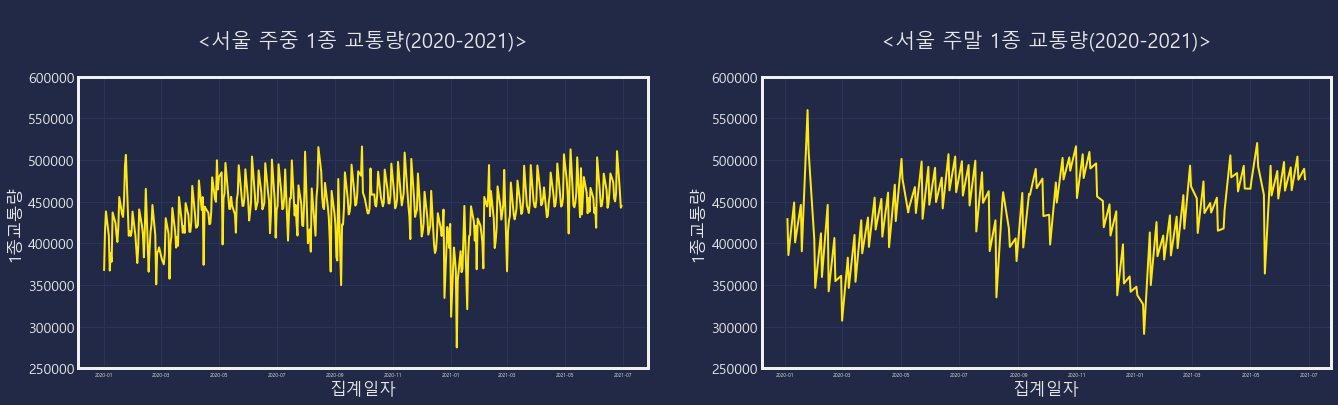

In [113]:
# Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([250000,600000])
    axes[i].grid(color=ColorGrid) 


axes[0].set(title='\n<ÏÑúÏö∏ Ï£ºÏ§ë 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÏÑúÏö∏ Ï£ºÎßê 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1,lw=2)
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')|(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº'))&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1,lw=2)

<AxesSubplot:title={'center':'\n<ÏÑúÏö∏ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

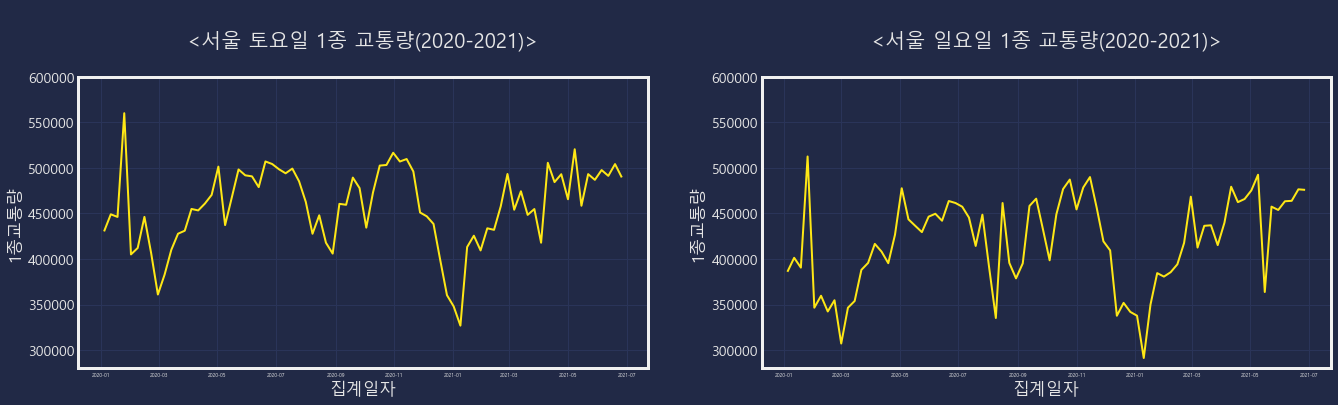

In [114]:
# ÏöîÏùºÎ≥Ñ Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(20,5)

for i in range(2):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([280000,600000])
    axes[i].grid(color=ColorGrid) 


axes[0].set(title='\n<ÏÑúÏö∏ ÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÏÑúÏö∏ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],lw=2,color=ColorLine1)
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],lw=2,color=ColorLine1)

### ÏÑúÏö∏ 2Ï¢Ö ÍµêÌÜµÎüâ

ÏûêÍ∞ÄÏö©Ïù¥ ÏïÑÎãå ÌÉùÎ∞∞ Ï∞®ÎüâÏùÑ ÌôïÏù∏Ìï¥ Î≥¥Ïûê.
Ïø†Ìå°, CJ ÌÉùÎ∞∞ÏôÄ Í∞ôÏùÄ ÌôîÎ¨º Ï∞®ÏñëÏùÄ 2Ï¢Ö Ï∞®ÎüâÏúºÎ°ú Î∂ÑÎ•ò ÎêúÎã§.

<AxesSubplot:title={'center':'\n<ÏÑúÏö∏ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

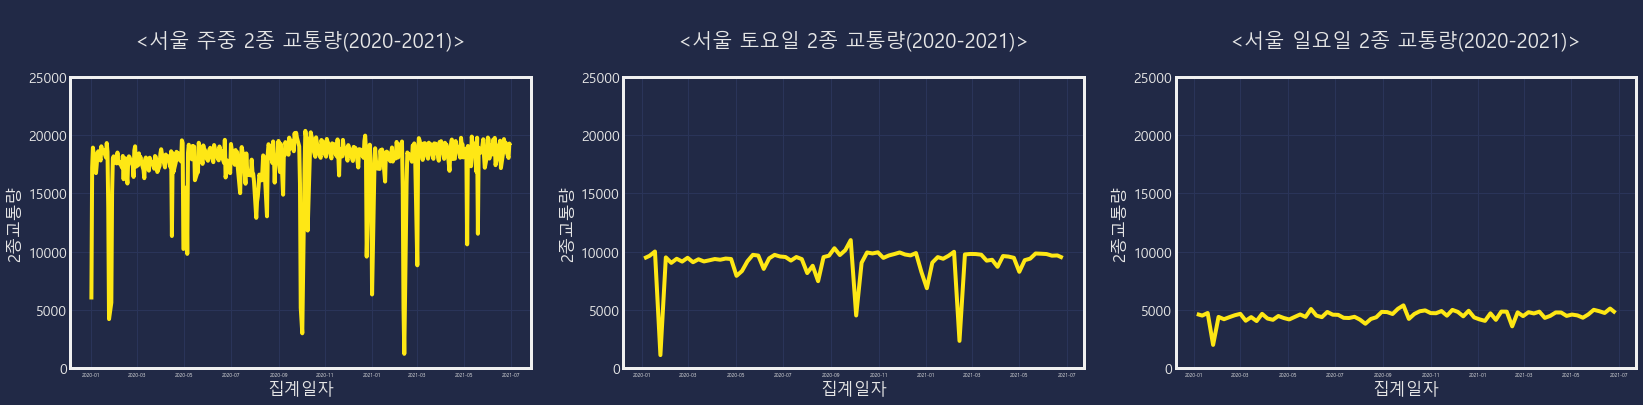

In [116]:
# 2Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\n<ÏÑúÏö∏ Ï£ºÏ§ë 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÏÑúÏö∏ ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[2].set(title='\n<ÏÑúÏö∏ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([0,25000])
    axes[i].grid(color=ColorGrid) 
sns.lineplot(data=seoul_traffic_data[((seoul_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(seoul_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1)
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1)
sns.lineplot(data=seoul_traffic_data[(seoul_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((seoul_traffic_data.ÎÖÑÎèÑ==2020)|(seoul_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[2],color=ColorLine1)

## ÎåÄÍµ¨ ÍµêÌÜµÎüâ Î∂ÑÏÑù

ÏΩîÎ°úÎÇò 19 1Ï∞® ÎåÄÏú†ÌñâÎ∞úÎ∞ú ÏßÄÏó≠Ïù∏ ÎåÄÍµ¨Î•º Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÇ¥Ìé¥ Î≥¥Ïûê.

In [117]:
daegu_traffic_data=traffic_data[(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÏÑúÎåÄÍµ¨')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='ÎÇ®ÎåÄÍµ¨')|(traffic_data['ÏòÅÏóÖÏÜåÎ™Ö']=='Î∂ÅÎåÄÍµ¨')].groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()
daegu_traffic_data=day_of_week(daegu_traffic_data)
daegu_traffic_data.head()

1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ    Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî   ÏöîÏùº
ÏßëÍ≥ÑÏùºÏûê                                                                       
2018-01-01  158432   1384   3607    712    516   5847  170498  2018  1  ÏõîÏöîÏùº
2018-01-02  161220   6162   7056   3431   3685   7883  189437  2018  1  ÌôîÏöîÏùº
2018-01-03  160008   7111   8303   4490   4598   7705  192215  2018  1  ÏàòÏöîÏùº
2018-01-04  161046   6983   8325   4443   4951   7736  193484  2018  1  Î™©ÏöîÏùº
2018-01-05  174056   7281   8340   4325   5110   8321  207433  2018  1  Í∏àÏöîÏùº

### ÎåÄÍµ¨ 1Ï¢Ö ÍµêÌÜµÎüâ Î∂ÑÏÑù

<AxesSubplot:title={'center':'\n<ÎåÄÍµ¨ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

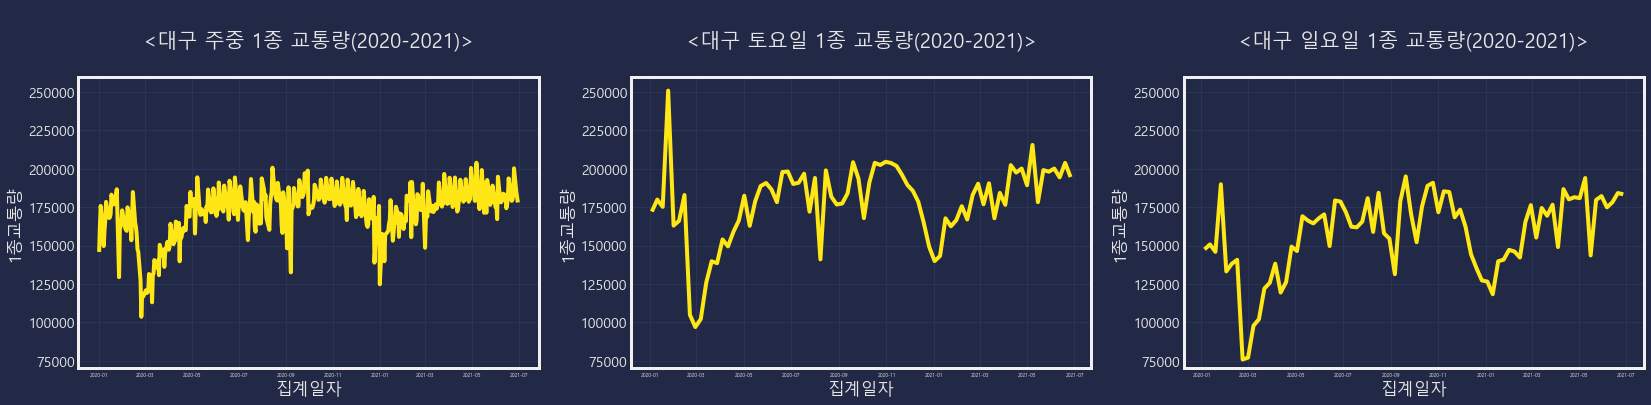

In [118]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\n<ÎåÄÍµ¨ Ï£ºÏ§ë 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÎåÄÍµ¨ ÌÜ†ÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[2].set(title='\n<ÎåÄÍµ¨ ÏùºÏöîÏùº 1Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].set_ylim([70000,260000])
    axes[i].grid(color=ColorGrid) 
sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1)
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1)
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[2],color=ColorLine1)

### ÎåÄÍµ¨ 2Ï¢Ö ÍµêÌÜµÎüâ Î∂ÑÏÑù

<AxesSubplot:title={'center':'\n<ÎåÄÍµ¨ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n'}, xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='2Ï¢ÖÍµêÌÜµÎüâ'>

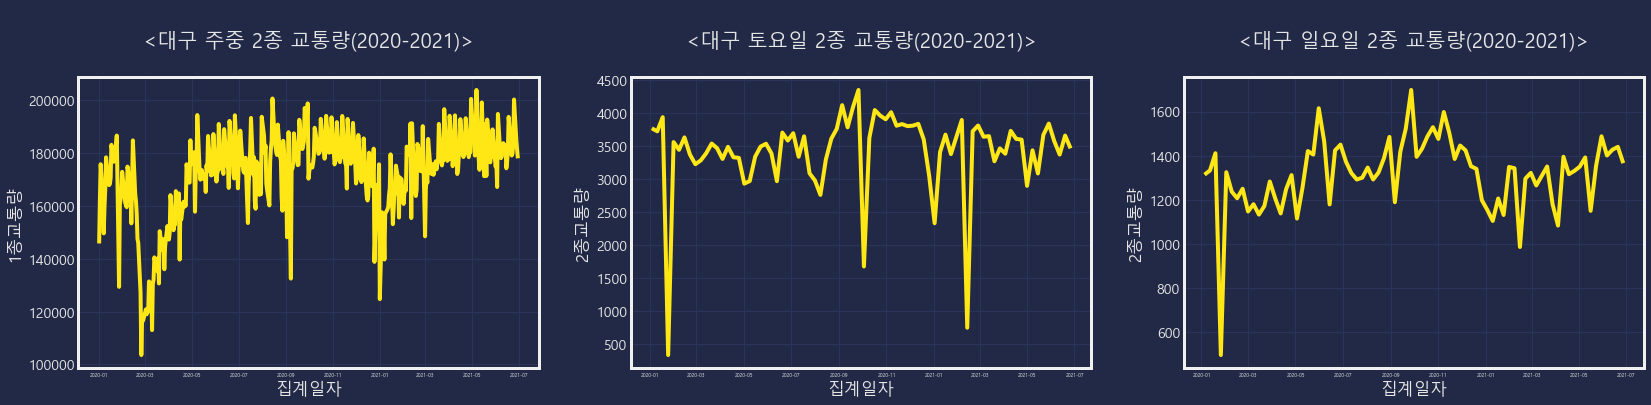

In [119]:
# 1Ï¢Ö ÍµêÌÜµÎüâ(Ï§ëÌòïÏ∞®) Ï£ºÏ§ë/ Ï£ºÎßê Ï∞®Ï¢Ö ÌèâÍ∑† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(25,5)

axes[0].set(title='\n<ÎåÄÍµ¨ Ï£ºÏ§ë 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[1].set(title='\n<ÎåÄÍµ¨ ÌÜ†ÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')
axes[2].set(title='\n<ÎåÄÍµ¨ ÏùºÏöîÏùº 2Ï¢Ö ÍµêÌÜµÎüâ(2020-2021)>\n')

for i in range(3):
    axes[i].get_yaxis().get_major_formatter().set_scientific(False)
    axes[i].grid(color=ColorGrid) 
sns.lineplot(data=daegu_traffic_data[((daegu_traffic_data.ÏöîÏùº=='ÏõîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÌôîÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='ÏàòÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Î™©ÏöîÏùº')
                                    |(daegu_traffic_data.ÏöîÏùº=='Í∏àÏöîÏùº'))
                                    &((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ', ax=axes[0],color=ColorLine1)
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÌÜ†ÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[1],color=ColorLine1)
sns.lineplot(data=daegu_traffic_data[(daegu_traffic_data.ÏöîÏùº=='ÏùºÏöîÏùº')&((daegu_traffic_data.ÎÖÑÎèÑ==2020)|(daegu_traffic_data.ÎÖÑÎèÑ==2021))], x='ÏßëÍ≥ÑÏùºÏûê', y='2Ï¢ÖÍµêÌÜµÎüâ', ax=axes[2],color=ColorLine1)

# ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê VS ÍµêÌÜµÎüâ

Ï†ÑÍµ≠Ï†ÅÏúºÎ°ú ÎòêÎäî ÏßÄÏó≠Î≥ÑÎ°ú ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê ÏàòÏôÄ ÍµêÌÜµÎüâÏùò Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [120]:
covid_traffic=covid_data_new.join(traffic_data_total['1Ï¢ÖÍµêÌÜµÎüâ'],how='inner')
covid_traffic['ÏùºÏûê']=covid_traffic.index
covid_traffic.head()

ÏùºÎ≥ÑÌôïÏßÑÏûê   ÎàÑÏ†ÅÌôïÏßÑÏûê   ÎàÑÏ†ÅÏÇ¨ÎßùÏûê    ÎÖÑÎèÑ  Ïõî    1Ï¢ÖÍµêÌÜµÎüâ         ÏùºÏûê
2021-06-30  761.0  156960  2018.0  2021  6  5761122 2021-06-30
2021-06-29  794.0  156166  2017.0  2021  6  5795714 2021-06-29
2021-06-28  595.0  155571  2015.0  2021  6  5983959 2021-06-28
2021-06-27  501.0  155070  2013.0  2021  6  6259574 2021-06-27
2021-06-26  614.0  154456  2012.0  2021  6  6655649 2021-06-26

<AxesSubplot:label='c110adf5-6b5d-4749-bf8e-37f7abab23f9', xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

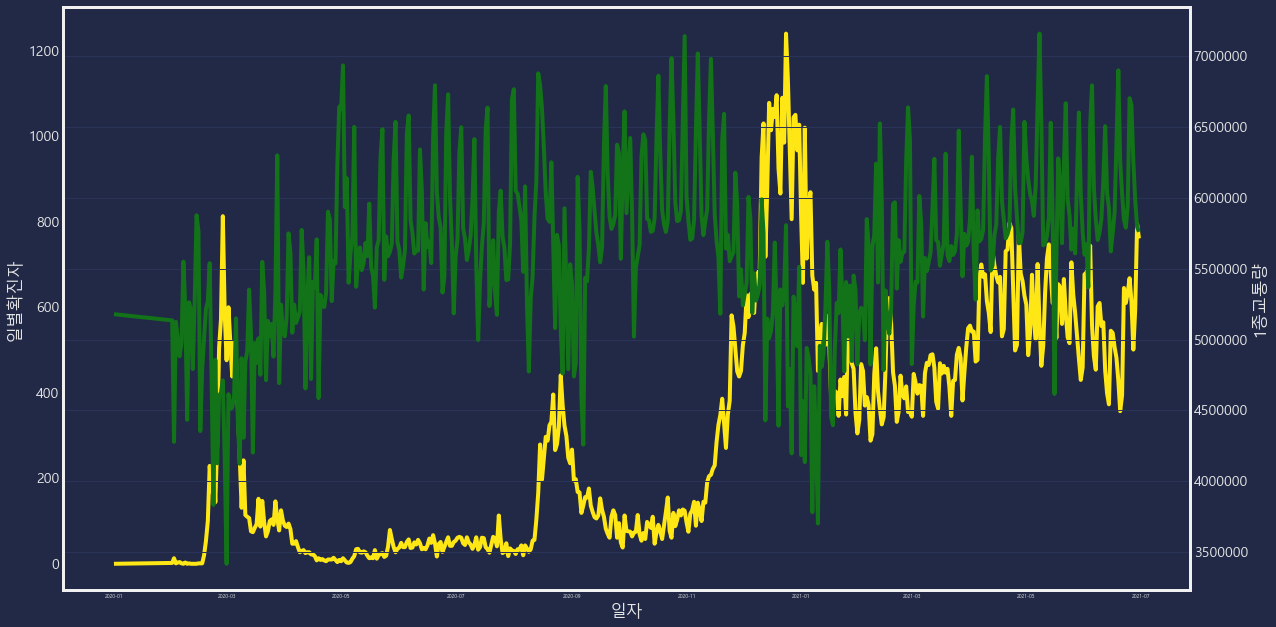

In [158]:
fig, ax1=plt.subplots(figsize=(18,10))
ax2=ax1.twinx()
ax1.grid(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.grid(color=ColorGrid) 

sns.lineplot(x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',data=covid_traffic, ax=ax1,color=ColorLine1)
sns.lineplot(x='ÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',data=covid_traffic, ax=ax2,color=ColorLine2)

<AxesSubplot:label='e189f3d7-3ccb-41de-a672-b1856d18bfa7', xlabel='ÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

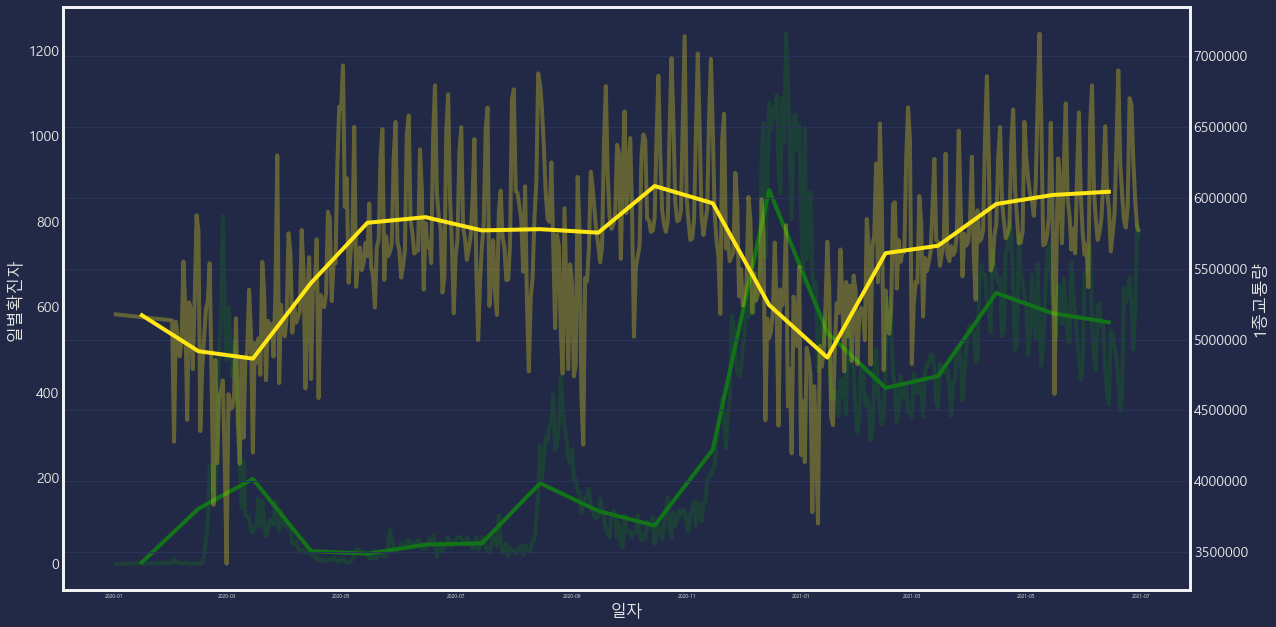

In [159]:
data1=pd.DataFrame(covid_traffic[((covid_traffic.ÎÖÑÎèÑ==2020)|(covid_traffic.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['1Ï¢ÖÍµêÌÜµÎüâ'].mean())
data2=pd.DataFrame(covid_traffic[((covid_traffic.ÎÖÑÎèÑ==2020)|(covid_traffic.ÎÖÑÎèÑ==2021))].groupby(['ÎÖÑÎèÑ','Ïõî'])['ÏùºÎ≥ÑÌôïÏßÑÏûê'].mean())
time=[]
for i in range(len(data.index)):
    time.append(str(data.index[i][0])+'-'+str(data.index[i][1])+'-15')
data1['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data1['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')
data2['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=time
data2['ÎÇ†Ïßú Ï§ëÏïôÍ∞í']=pd.to_datetime(data['ÎÇ†Ïßú Ï§ëÏïôÍ∞í'],format='%Y-%m-%d')

fig, ax1=plt.subplots(figsize=(18,10))
ax2=ax1.twinx()
ax1.grid(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.grid(color=ColorGrid) 

sns.lineplot(x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',data=covid_traffic,color=ColorLine2, ax=ax1,alpha=0.3)
sns.lineplot(x='ÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',data=covid_traffic, ax=ax2, color=ColorLine1,alpha=0.3)
sns.lineplot(x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',data=data2,color=ColorLine2, ax=ax1)
sns.lineplot(x='ÎÇ†Ïßú Ï§ëÏïôÍ∞í', y='1Ï¢ÖÍµêÌÜµÎüâ',data=data1, ax=ax2, color=ColorLine1)

## ÌôïÏßÑÏûê ÏàòÏùò Îã®ÏúÑÎ≥Ñ ÍµêÌÜµÎüâ Î∂ÑÏÑù

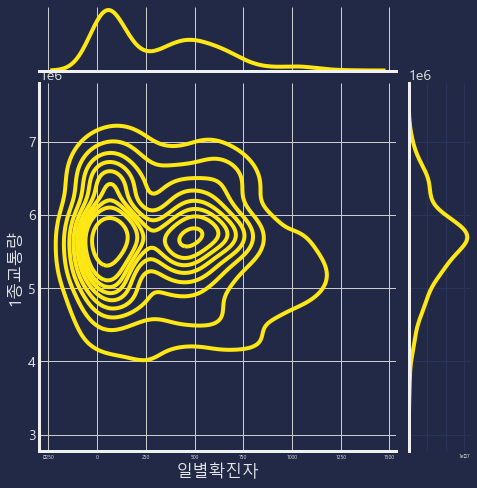

In [160]:
sns.jointplot(data=covid_traffic, x='ÏùºÎ≥ÑÌôïÏßÑÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',kind='kde', height=7,color=ColorLine1)
plt.grid(color=ColorGrid)

## Ïó∞Ìú¥Ï≤† ÍµêÌÜµÎüâ Î∞è ÌôïÏßÑÏûê Ïàò Î∂ÑÏÑù

1Ïõî(Ïó∞Ï¥àÌñâÏÇ¨), 2Ïõî(ÏÑ§), 5Ïõî(Ïñ¥Î¶∞Ïù¥ÎÇ†) Ï§ëÏã¨ÏúºÎ°ú Î∂ÑÏÑù

### 1Î∂ÑÍ∏∞(1Ïõî, 2Ïõî) Î∂ÑÏÑù

In [161]:
#1Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
fitst_traffic_data=pd.concat([traffic_2020_01,traffic_2021_01])

In [162]:
#1Î∂ÑÍ∏∞Îç∞Ïù¥ÌÑ∞ ÎÖÑÎèÑ, Ïõî ÏπºÎüºÏ∂îÍ∞Ä
fitst_traffic_data.index=fitst_traffic_data.ÏßëÍ≥ÑÏùºÏûê
fitst_traffic_data=fitst_traffic_data.drop('ÏßëÍ≥ÑÏùºÏûê',axis=1)
fitst_traffic_data=fitst_traffic_data[['ÏòÅÏóÖÏÜåÎ™Ö','1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ']]
fitst_traffic_data=day_of_week(fitst_traffic_data)

In [163]:
fitst_traffic_data.head()

ÏòÅÏóÖÏÜåÎ™Ö  1Ï¢ÖÍµêÌÜµÎüâ  2Ï¢ÖÍµêÌÜµÎüâ  3Ï¢ÖÍµêÌÜµÎüâ  4Ï¢ÖÍµêÌÜµÎüâ  5Ï¢ÖÍµêÌÜµÎüâ  6Ï¢ÖÍµêÌÜµÎüâ  Ï¥ùÍµêÌÜµÎüâ    ÎÖÑÎèÑ  Ïõî  \
ÏßëÍ≥ÑÏùºÏûê                                                                         
2020-01-01     Í∞ÄÎùΩ    147      2      3     13      8      9   182  2020  1   
2020-01-01     Í∞ÄÎùΩ    311      2      9     16     74      8   420  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   1769     20     40     49    120    260  2258  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   8312     26     72     40    499    444  9393  2020  1   
2020-01-01  Í∞ÄÎùΩ(Í∞ú)   2383     33     40     46    141    322  2965  2020  1   

             ÏöîÏùº  
ÏßëÍ≥ÑÏùºÏûê             
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº  
2020-01-01  ÏàòÏöîÏùº

#### 1Ïõî Ï§ëÏã¨ Î∂ÑÏÑù

In [164]:
# 2021 1Î∂ÑÍ∏∞Ï§ë 1ÏõîÎ°úÎßå Í∑∏Î£πÌôî
jan_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2021)&(fitst_traffic_data['Ïõî']==1)]
jan_traffic_data=jan_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(5.691220e+06)
jan_traffic_data=day_of_week(jan_traffic_data)
#2021 1Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/1020
jan_covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
jan_covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']

jan_covid_data_new.index=pd.to_datetime(jan_covid_data_new['ÏùºÏûê'],format='%Y%m%d')
jan_covid_data_new=jan_covid_data_new.drop('ÏùºÏûê',axis=1)
jan_covid_traffic=jan_covid_data_new.join(jan_traffic_data,how='left')
jan_covid_traffic = jan_covid_traffic.dropna(axis=0)
jan_covid_traffic['ÏßëÍ≥ÑÏùºÏûê']=jan_covid_traffic.index
jan_covid_traffic.head()


ÏùºÎ≥ÑÌôïÏßÑÏûê     1Ï¢ÖÍµêÌÜµÎüâ     2Ï¢ÖÍµêÌÜµÎüâ     3Ï¢ÖÍµêÌÜµÎüâ     4Ï¢ÖÍµêÌÜµÎüâ     5Ï¢ÖÍµêÌÜµÎüâ  \
ÏùºÏûê                                                                       
2021-01-31  0.299020  0.847764  0.009649  0.016889  0.009903  0.009623   
2021-01-30  0.347059  0.939827  0.021057  0.026906  0.022306  0.034722   
2021-01-29  0.447059  0.957940  0.038164  0.045617  0.038885  0.055170   
2021-01-28  0.459804  0.851930  0.038533  0.046201  0.042250  0.058366   
2021-01-27  0.487255  0.945442  0.040355  0.047042  0.042991  0.058943   

               6Ï¢ÖÍµêÌÜµÎüâ      Ï¥ùÍµêÌÜµÎüâ      ÎÖÑÎèÑ    Ïõî   ÏöîÏùº       ÏßëÍ≥ÑÏùºÏûê  
ÏùºÏûê                                                           
2021-01-31  0.036125  0.929953  2021.0  1.0  ÏùºÏöîÏùº 2021-01-31  
2021-01-30  0.042135  1.086954  2021.0  1.0  ÌÜ†ÏöîÏùº 2021-01-30  
2021-01-29  0.051361  1.187137  2021.0  1.0  Í∏àÏöîÏùº 2021-01-29  
2021-01-28  0.045590  1.082870  2021.0  1.0  Î™©ÏöîÏùº 2021-01-28  
2021-01-27  0.051469  1.186242  2021.0  1.0  ÏàòÏöîÏùº 2021-01-27

In [165]:
def heat(b):
    a=b.corr()
    a=a.drop(['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ','Ï¥ùÍµêÌÜµÎüâ'],axis=1)
    a=a.drop(['ÏùºÎ≥ÑÌôïÏßÑÏûê'])
    return a

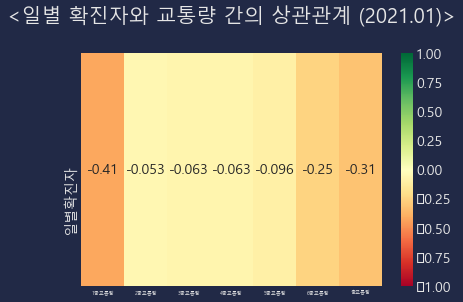

In [166]:
jan_covid_traffic_cor=jan_covid_traffic.drop(['ÎÖÑÎèÑ','Ïõî'],axis=1)
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏàòÏπò Í∑∏ÎûòÌîÑ [Correlation Heatmap with Number]
jan_covid_traffic_cor=heat(jan_covid_traffic_cor)
jan_covid_traffic_cor=jan_covid_traffic_cor.T
sns.heatmap(jan_covid_traffic_cor, vmin=-1, vmax=1, annot=True,cmap='RdYlGn')
plt.title('<ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2021.01)>\n')
plt.show()

1Ï¢Ö ÍµêÌÜµÎüâÍ≥º ÏùºÎ≥Ñ ÌôïÏßÑÏûê ÏàòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÏùÑÎïå ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäîÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
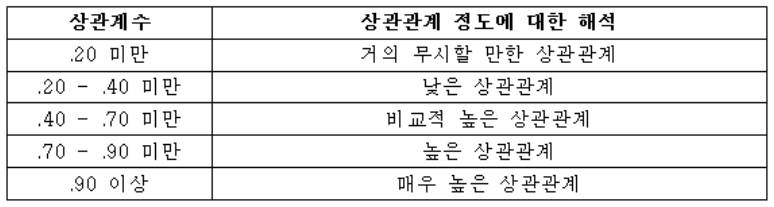



<AxesSubplot:xlabel='ÏßëÍ≥ÑÏùºÏûê', ylabel='1Ï¢ÖÍµêÌÜµÎüâ'>

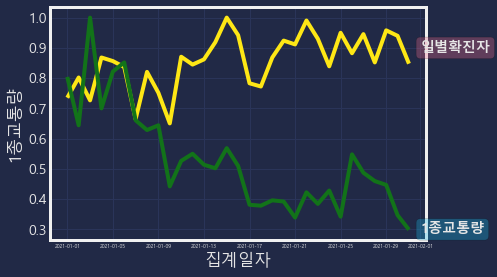

In [167]:
#2021 1Ï¢Ö ÍµêÌÜµÎüâ(ÎåÄÎ∂ÄÎ∂ÑÏùò ÏûêÍ∞ÄÏö©)
#Ï£ºÌô©ÏÉâÏù¥ ÍµêÌÜµÎüâ, ÌååÎûÄÏÉâÏù¥ ÏΩîÎ°úÎÇò
ax2=plt.gca()
plt.rc('xtick', labelsize=5)  # xÏ∂ï ÎààÍ∏à Ìè∞Ìä∏ ÌÅ¨Í∏∞ 
ax2.text('2021-02-01', 0.9, s='ÏùºÎ≥ÑÌôïÏßÑÏûê', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))
ax2.grid(color=ColorGrid) 
ax2.text('2021-02-01',0.3, s='1Ï¢ÖÍµêÌÜµÎüâ', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))
sns.lineplot(data=jan_covid_traffic, x='ÏßëÍ≥ÑÏùºÏûê', y='1Ï¢ÖÍµêÌÜµÎüâ',color=ColorLine1)
sns.lineplot(data=jan_covid_traffic, x='ÏùºÏûê', y='ÏùºÎ≥ÑÌôïÏßÑÏûê',color=ColorLine2)

#### 2Ïõî Ï§ëÏã¨ Î∂ÑÏÑù

In [139]:
# 2020 1Î∂ÑÍ∏∞Ï§ë 2ÏõîÎ°úÎßå Í∑∏Î£πÌôî

feb_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2020)&(fitst_traffic_data['Ïõî']==2)]
feb_traffic_data=feb_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(5.877788e+06)


# 2021 1Î∂ÑÍ∏∞Ï§ë 2ÏõîÎ°úÎßå Í∑∏Î£πÌôî

lastfeb_traffic_data=fitst_traffic_data[(fitst_traffic_data['ÎÖÑÎèÑ']==2021)&(fitst_traffic_data['Ïõî']==2)]
lastfeb_traffic_data=lastfeb_traffic_data.groupby('ÏßëÍ≥ÑÏùºÏûê')['1Ï¢ÖÍµêÌÜµÎüâ', '2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ', '4Ï¢ÖÍµêÌÜµÎüâ', '5Ï¢ÖÍµêÌÜµÎüâ', '6Ï¢ÖÍµêÌÜµÎüâ', 'Ï¥ùÍµêÌÜµÎüâ'].sum()/(6.639591e+06)


In [140]:
#2020 2Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/813
feb_covid_data_new=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
feb_covid_data_new.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']
feb_covid_data_new.index=pd.to_datetime(feb_covid_data_new['ÏùºÏûê'],format='%Y%m%d')


#2021 2Ïõî ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
covid_data['ÏùºÎ≥ÑÌôïÏßÑÏûê']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/621
lastfeb_covid_data_n=covid_data[['stateDt','ÏùºÎ≥ÑÌôïÏßÑÏûê']]
lastfeb_covid_data_n.columns=['ÏùºÏûê','ÏùºÎ≥ÑÌôïÏßÑÏûê']
lastfeb_covid_data_n.index=pd.to_datetime(lastfeb_covid_data_n['ÏùºÏûê'],format='%Y%m%d')


In [141]:
feb_2020_covid_traffic=feb_traffic_data.join(feb_covid_data_new['ÏùºÎ≥ÑÌôïÏßÑÏûê'], how='inner')
feb_2021_covid_traffic=lastfeb_traffic_data.join(lastfeb_covid_data_n['ÏùºÎ≥ÑÌôïÏßÑÏûê'], how='inner')

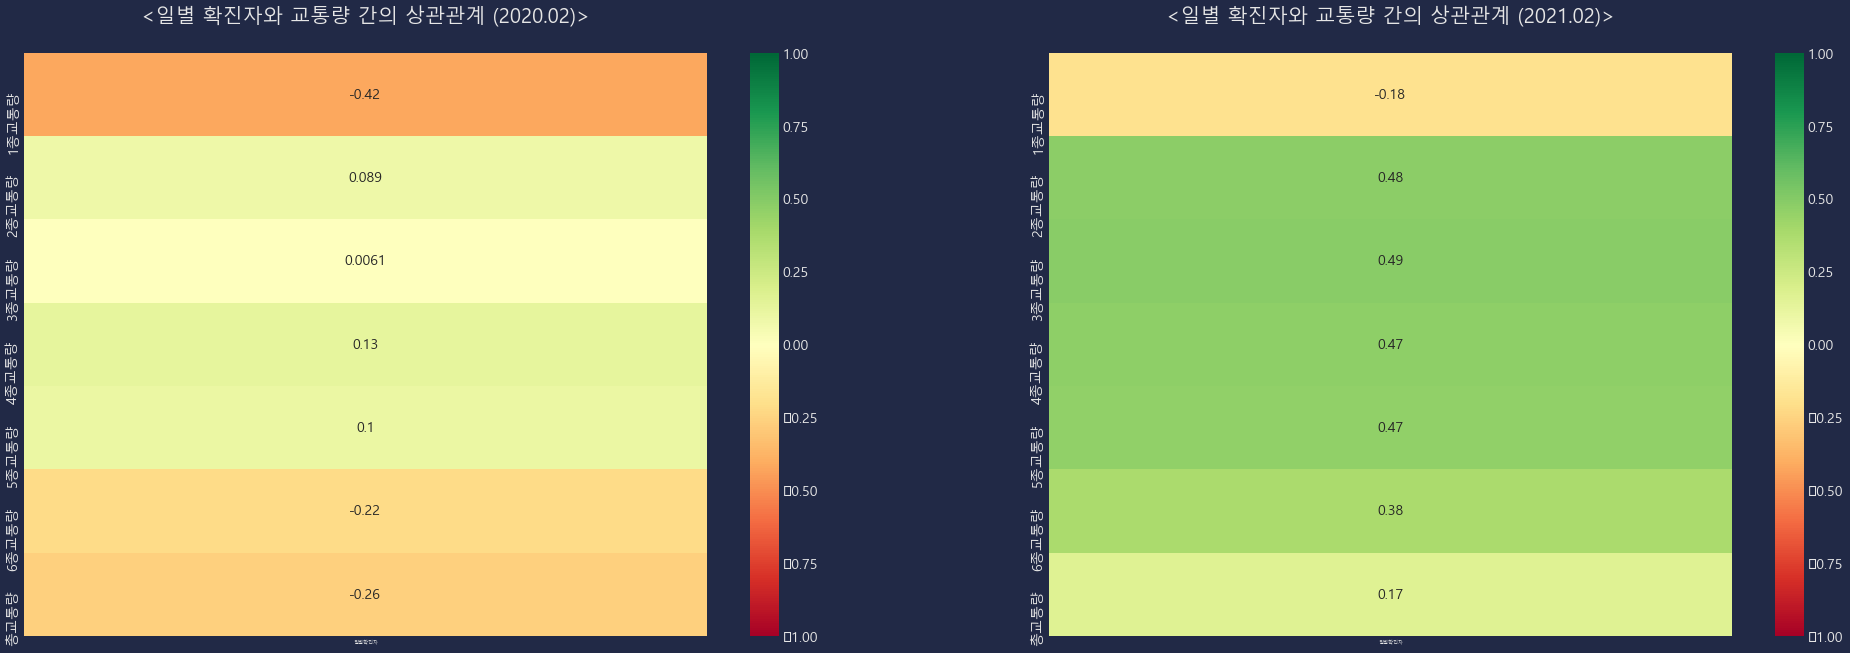

In [142]:
fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(30,10)
axes[0].set(title='<ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2020.02)>\n')
axes[1].set(title='<ÏùºÎ≥Ñ ÌôïÏßÑÏûêÏôÄ ÍµêÌÜµÎüâ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (2021.02)>\n')
feb_2020_covid_traffic_heat=heat(feb_2020_covid_traffic)
sns.heatmap(feb_2020_covid_traffic_heat, vmin=-1, vmax=1, annot=True,ax=axes[0],cmap='RdYlGn')
feb_2021_covid_traffic_heat=heat(feb_2021_covid_traffic)
sns.heatmap(feb_2021_covid_traffic_heat, vmin=-1, vmax=1, annot=True,ax=axes[1],cmap='RdYlGn')

plt.show()

In [143]:
feb_2020_covid_traffic['ÏöîÏùº']=feb_2020_covid_traffic.index
feb_2021_covid_traffic['ÏöîÏùº']=feb_2021_covid_traffic.index
feb_2021_covid_traffic.head()

1Ï¢ÖÍµêÌÜµÎüâ     2Ï¢ÖÍµêÌÜµÎüâ     3Ï¢ÖÍµêÌÜµÎüâ     4Ï¢ÖÍµêÌÜµÎüâ     5Ï¢ÖÍµêÌÜµÎüâ     6Ï¢ÖÍµêÌÜµÎüâ  \
2021-02-01  0.780393  0.032268  0.037997  0.032387  0.045009  0.043072   
2021-02-02  0.786890  0.035401  0.040843  0.038070  0.051677  0.042959   
2021-02-03  0.781969  0.034858  0.040817  0.038502  0.052838  0.042151   
2021-02-04  0.752439  0.033535  0.039756  0.036923  0.050278  0.040003   
2021-02-05  0.881208  0.035219  0.041369  0.037873  0.053373  0.046230   

                Ï¥ùÍµêÌÜµÎüâ     ÏùºÎ≥ÑÌôïÏßÑÏûê         ÏöîÏùº  
2021-02-01  0.971127  0.541063 2021-02-01  
2021-02-02  0.995841  0.752013 2021-02-02  
2021-02-03  0.991135  0.726248 2021-02-03  
2021-02-04  0.952934  0.595813 2021-02-04  
2021-02-05  1.095271  0.628019 2021-02-05

Text(0.5, 0.98, '<2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê>')

<Figure size 432x288 with 0 Axes>

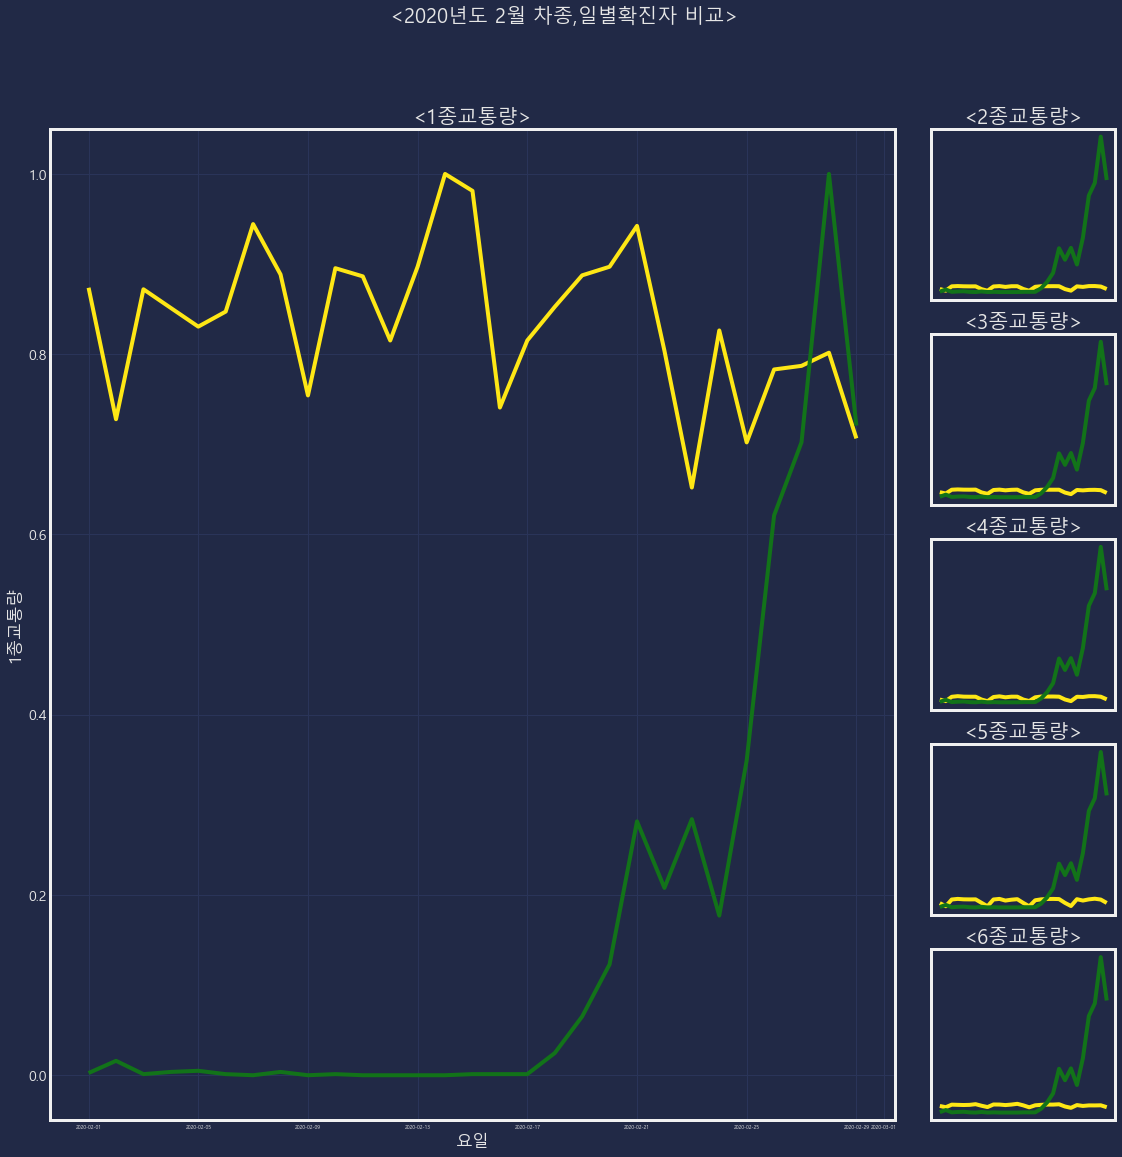

In [146]:
# 2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢ÖvsÏùºÎ≥ÑÌôïÏßÑÏûê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
traffic=['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']
plt.figure(0)
plt.figure(figsize=(17,17))
ax1 = plt.subplot2grid((5,5), (0,0), colspan=4,rowspan=5)
ax2 = plt.subplot2grid((5,5), (0,4), rowspan=1)
ax3 = plt.subplot2grid((5,5), (1,4), rowspan=1)
ax4 = plt.subplot2grid((5,5), (2,4), rowspan=1)
ax5 = plt.subplot2grid((5,5), (3,4), rowspan=1)
ax6 = plt.subplot2grid((5,5), (4,4), rowspan=1)
axis_t=[ax1,ax2,ax3,ax4,ax5,ax6]

for idx,i in enumerate(axis_t):
    i.grid(color=ColorGrid) 
    if idx>=1:
        i.set_xticks([])
        i.set_yticks([])
    sns.lineplot(x='ÏöîÏùº', y=traffic[idx], data=feb_2020_covid_traffic,ax=i,color=ColorLine1)
    i.set(title='<'+traffic[idx]+'>')
    sns.lineplot(x='ÏöîÏùº', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', data=feb_2020_covid_traffic,ax=i,color=ColorLine2)
plt.suptitle('<2020ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê>',fontsize=20)

<Figure size 432x288 with 0 Axes>

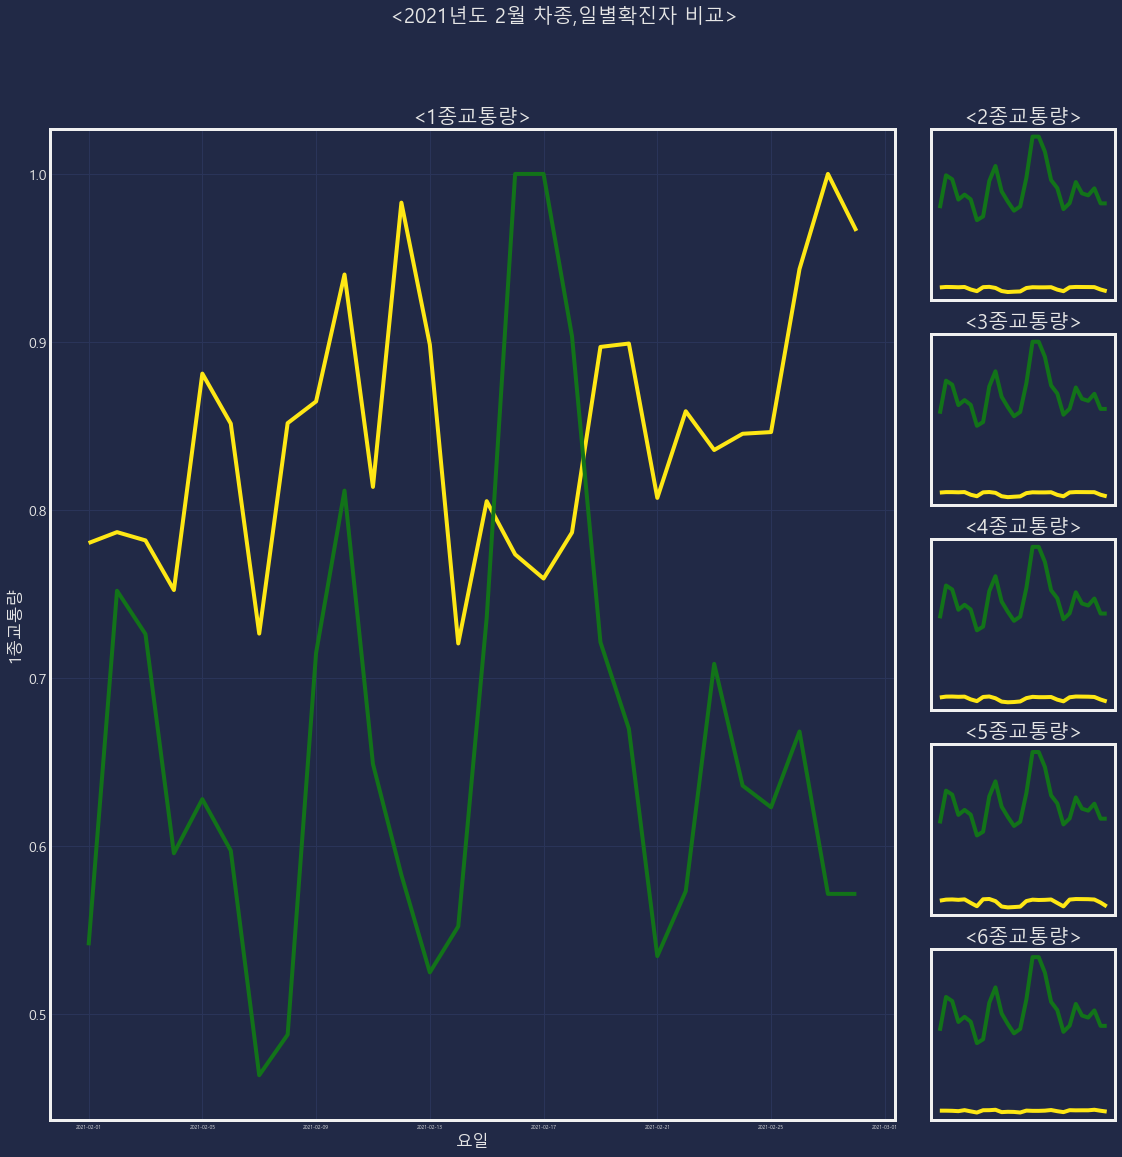

In [147]:
# 2021ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢ÖvsÏùºÎ≥ÑÌôïÏßÑÏûê Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
traffic=['1Ï¢ÖÍµêÌÜµÎüâ','2Ï¢ÖÍµêÌÜµÎüâ','3Ï¢ÖÍµêÌÜµÎüâ','4Ï¢ÖÍµêÌÜµÎüâ','5Ï¢ÖÍµêÌÜµÎüâ','6Ï¢ÖÍµêÌÜµÎüâ']
a=[ax1,ax2,ax3,ax4,ax5,ax6]
plt.figure(0)
plt.figure(figsize=(17,17))
ax1 = plt.subplot2grid((5,5), (0,0), colspan=4,rowspan=5)
ax2 = plt.subplot2grid((5,5), (0,4), rowspan=1)
ax3 = plt.subplot2grid((5,5), (1,4), rowspan=1)
ax4 = plt.subplot2grid((5,5), (2,4), rowspan=1)
ax5 = plt.subplot2grid((5,5), (3,4), rowspan=1)
ax6 = plt.subplot2grid((5,5), (4,4), rowspan=1)
axis_t=[ax1,ax2,ax3,ax4,ax5,ax6]

for idx,i in enumerate(axis_t):
    i.grid(color=ColorGrid) 
    if idx>=1:
        i.set_xticks([])
        i.set_yticks([])
    sns.lineplot(x='ÏöîÏùº', y=traffic[idx], data=feb_2021_covid_traffic,ax=i,color=ColorLine1)
    i.set(title='<'+traffic[idx]+'>')
    sns.lineplot(x='ÏöîÏùº', y='ÏùºÎ≥ÑÌôïÏßÑÏûê', data=feb_2021_covid_traffic,ax=i,color=ColorLine2)
plt.suptitle('<2021ÎÖÑÎèÑ 2Ïõî Ï∞®Ï¢Ö,ÏùºÎ≥ÑÌôïÏßÑÏûê ÎπÑÍµê>',fontsize=20)
fig.tight_layout()

# ü§¶‚Äç‚ôÄÔ∏èü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äçü§¶‚Äç
